# **IMPORT LIBRARIES**



In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score

from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving aggregate.csv to aggregate.csv


In [ ]:
df = pd.read_csv('aggregate.csv')

# **DATASET OVERVIEW**

**Business Context:**

We are analyzing a dataset called "Global Electronics Retailer," provided by Maven Analytics, covering the years 2015 to 2021.

This dataset includes detailed information on transactions, products, customers, stores, and currency exchange rates. The product lines encompass TV and Video, Audio, Home Appliances, Computers, Cell Phones, Games and Toys, Cameras and Camcorders, and Music, Movies, and Audio Books.

Sales data spans multiple regions, including Australia, Canada, France, Germany, Italy, Netherlands, United Kingdom, United States, and the online channel.

**Purpose of Analysis:**

The primary objective of this analysis is to demonstrate advanced analytical skills by extracting actionable insights from the dataset. We aim to:

(1) Analyze sales trends over time.

(2) Understand how different customer segments interact with overall performance and their behaviour over product and shopping method preferences.

Through this analysis, we hope to help in understanding market dynamics, customer preferences, and identifying opportunities for strategic business improvements.

**Data Model:**

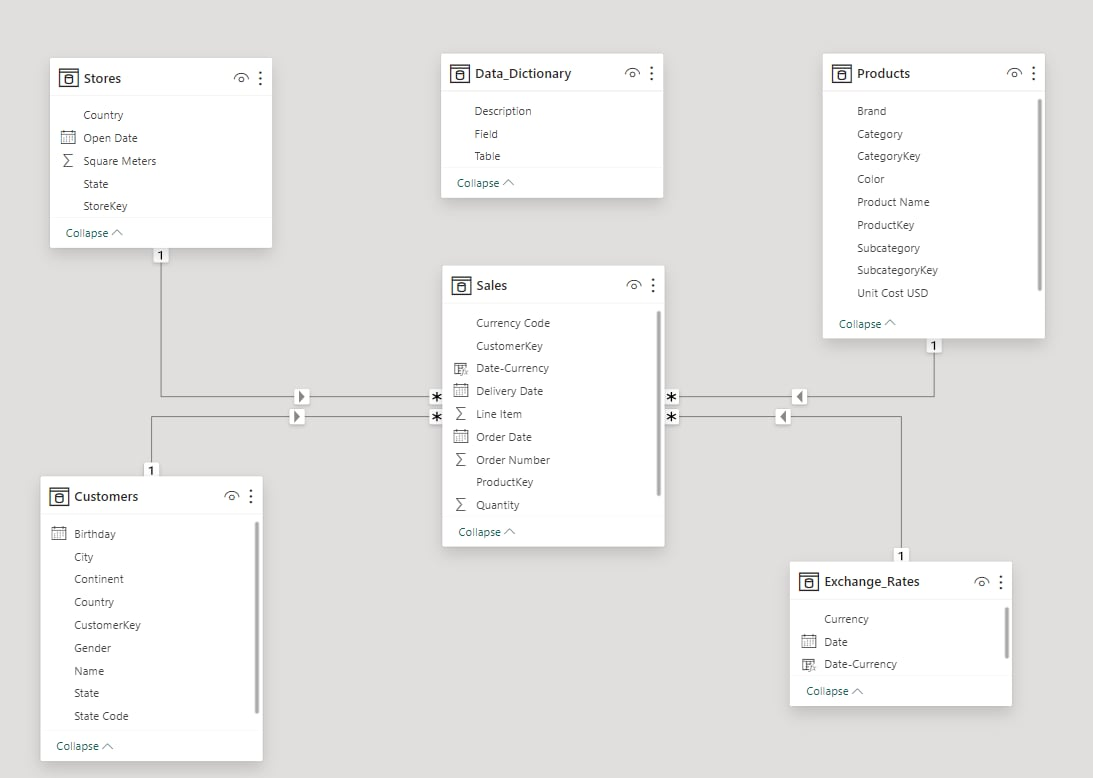

In [ ]:
Image('Data Model.jpg', width = 800)

**Data Dictionary:**

In [ ]:
Dictionary = pd.read_csv('Data_Dictionary.csv')
Dictionary

,Table,Field,Description
0,Sales,Order Number,Unique ID for each order
1,Sales,Line Item,Identifies individual products purchased as pa...
2,Sales,Order Date,Date the order was placed
3,Sales,Delivery Date,Date the order was delivered
4,Sales,CustomerKey,Unique key identifying which customer placed t...
5,Sales,StoreKey,Unique key identifying which store processed t...
6,Sales,ProductKey,Unique key identifying which product was purch...
7,Sales,Quantity,Number of items purchased
8,Sales,Currency Code,Currency used to process the order
9,Customers,CustomerKey,Primary key to identify customers


# **EDA**

In [ ]:
df = pd.read_csv('DF.csv')
df.head()

,Order_Number,Line_Item,Order_Date,CustomerKey,Gender,Name,Customer_City,Customer_State,Customer_Country,Continent,...,Product_Name,Brand,Color,Unit_Cost_USD,Unit_Price_USD,SubcategoryKey,Subcategory,CategoryKey,Category,Quantity
0,366000,1,2016-01-01,265598,Male,Tyler Vaught,London,Ontario,Canada,North America,...,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,1
1,366001,1,2016-01-01,1269051,Male,Frank Upchurch,Auberry,California,United States,North America,...,A. Datum SLR Camera X136 Silver,A. Datum,Silver,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders,2
2,366001,2,2016-01-01,1269051,Male,Frank Upchurch,Auberry,California,United States,North America,...,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,220.64,665.94,803,Microwaves,8,Home Appliances,1
3,366002,1,2016-01-01,266019,Female,Joan Roche,Red Deer,Alberta,Canada,North America,...,Contoso SLR Camera M146 Orange,Contoso,Orange,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders,7
4,366002,2,2016-01-01,266019,Female,Joan Roche,Red Deer,Alberta,Canada,North America,...,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,166.20,326.00,301,Laptops,3,Computers,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_Number      62884 non-null  int64  
 1   Line_Item         62884 non-null  int64  
 2   Order_Date        62884 non-null  object 
 3   CustomerKey       62884 non-null  int64  
 4   Gender            62884 non-null  object 
 5   Name              62884 non-null  object 
 6   Customer_City     62884 non-null  object 
 7   Customer_State    62884 non-null  object 
 8   Customer_Country  62884 non-null  object 
 9   Continent         62884 non-null  object 
 10  Birthday          62884 non-null  object 
 11  StoreKey          62884 non-null  int64  
 12  Store_Country     62884 non-null  object 
 13  Store_State       62884 non-null  object 
 14  Square_Meters     49719 non-null  float64
 15  Open_Date         62884 non-null  object 
 16  ProductKey        62884 non-null  int64 

In [ ]:
df.isnull().sum()

Order_Number            0
Line_Item               0
Order_Date              0
CustomerKey             0
Gender                  0
Name                    0
Customer_City           0
Customer_State          0
Customer_Country        0
Continent               0
Birthday                0
StoreKey                0
Store_Country           0
Store_State             0
Square_Meters       13165
Open_Date               0
ProductKey              0
Product_Name            0
Brand                   0
Color                   0
Unit_Cost_USD           0
Unit_Price_USD          0
SubcategoryKey          0
Subcategory             0
CategoryKey             0
Category                0
Quantity                0
dtype: int64

In [ ]:
df[['Order_Number', 'Line_Item', 'CustomerKey', 'StoreKey', 'ProductKey', 'SubcategoryKey', 'CategoryKey']] = df[['Order_Number', 'Line_Item', 'CustomerKey', 'StoreKey', 'ProductKey', 'SubcategoryKey', 'CategoryKey']].astype(object)
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format = '%Y-%m-%d')
df['Birthday'] = pd.to_datetime(df['Birthday'], format = '%Y-%m-%d')
df['Open_Date'] = pd.to_datetime(df['Open_Date'], format = '%Y-%m-%d')

# **OVERVIEW ANALYSIS**

## **METRICS**

**Total Orders**

In [ ]:
print(f'Total Orders: {df["Order_Number"].nunique()} orders')

Total Orders: 26326 orders


**Total Revenue**

In [ ]:
df['Amount'] = df['Quantity'] * df['Unit_Price_USD']
print(f'Total Revenue: {format(int(df["Amount"].sum()), ",d")} USD')

Total Revenue: 55,755,479 USD


**Total Profit**

In [ ]:
df['Cost'] = df['Unit_Cost_USD'] * df['Quantity']
df['Profit'] = df['Amount'] - df['Cost']
print(f'Total Profit: {format(int(df["Profit"].sum()), ",d")} USD')

Total Profit: 32,662,688 USD


**Average Order Value**

In [ ]:
print(f'Average Order Value: {format(int(df["Amount"].sum() / df["Order_Number"].nunique()), ",d")} USD/order')

Average Order Value: 2,117 USD/order


**Total Customers**

In [ ]:
print(f'Total Customers: {df["CustomerKey"].nunique()} customers')

Total Customers: 11887 customers


## **DIMENSIONS**

In [ ]:
print('The dataset spans from:', df['Order_Date'].dt.date.min(), 'to', df['Order_Date'].dt.date.max())

The dataset spans from: 2016-01-01 to 2021-02-20


In [ ]:
def define_6_month_period(date):
    if date.month <= 6:
        return pd.Timestamp(year = date.year, month = 1, day = 1)
    else:
        return pd.Timestamp(year = date.year, month = 7, day = 1)

df['Year-Month'] = df['Order_Date'].apply(define_6_month_period)

df_time = df.groupby('Year-Month', as_index=False).agg(
    Total_Orders = ('Order_Number', 'nunique'),
    Revenue = ('Amount', 'sum')
)

df_time.columns = ['Month', 'Total Orders', 'Revenue']
df_time['Revenue'] = df_time['Revenue'].round(0).astype(int)
df_time.Month = pd.to_datetime(df_time.Month)
df_time['Month'] = df_time.Month.dt.strftime('%Y-%m')

df_time

,Month,Total Orders,Revenue
0,2016-01,1239,3104588
1,2016-07,1626,3842206
2,2017-01,1331,3058460
3,2017-07,1949,4362962
4,2018-01,2126,4814238
5,2018-07,3839,7974723
6,2019-01,3900,8038888
7,2019-07,5183,10225495
8,2020-01,3375,6830873
9,2020-07,1260,2463759


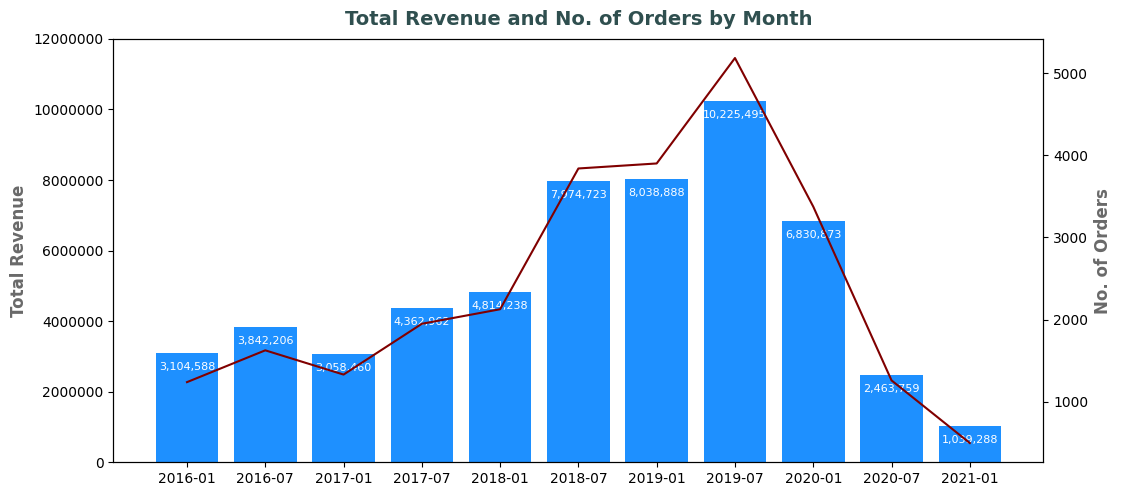

In [ ]:
from matplotlib.ticker import FuncFormatter
fig, ax1 = plt.subplots(figsize = (12, 5.5))

ax1.bar(df_time.Month.astype(str), df_time.Revenue, color = 'dodgerblue', width = 0.8)
ax1.set_ylabel('Total Revenue', fontsize = 12, fontweight = 'bold', color = 'dimgray')

def millions(x, pos):
    return '%1.0f' % (x)

ax1.yaxis.set_major_formatter(FuncFormatter(millions))
ax1.set_title('Total Revenue and No. of Orders by Month', fontsize = 14, fontweight = 'bold', color = 'darkslategray', pad = 10)
ax1.set_ylim(bottom = 0, top = 12000000)

ax2 = ax1.twinx()
ax2.plot(df_time.Month.astype(str), df_time['Total Orders'], color = 'maroon')
ax2.set_ylabel('No. of Orders', fontsize = 12, fontweight = 'bold', color = 'dimgray')

for i, xy in enumerate(zip(df_time.Month.astype(str), df_time.Revenue)):
    annotation_text = '{:,.0f}'.format(xy[1])
    ax1.annotate(annotation_text, xy=xy, textcoords='offset points', xytext=(0, - 10), fontsize = 8, ha='center', va='center', color = 'white')

plt.show()

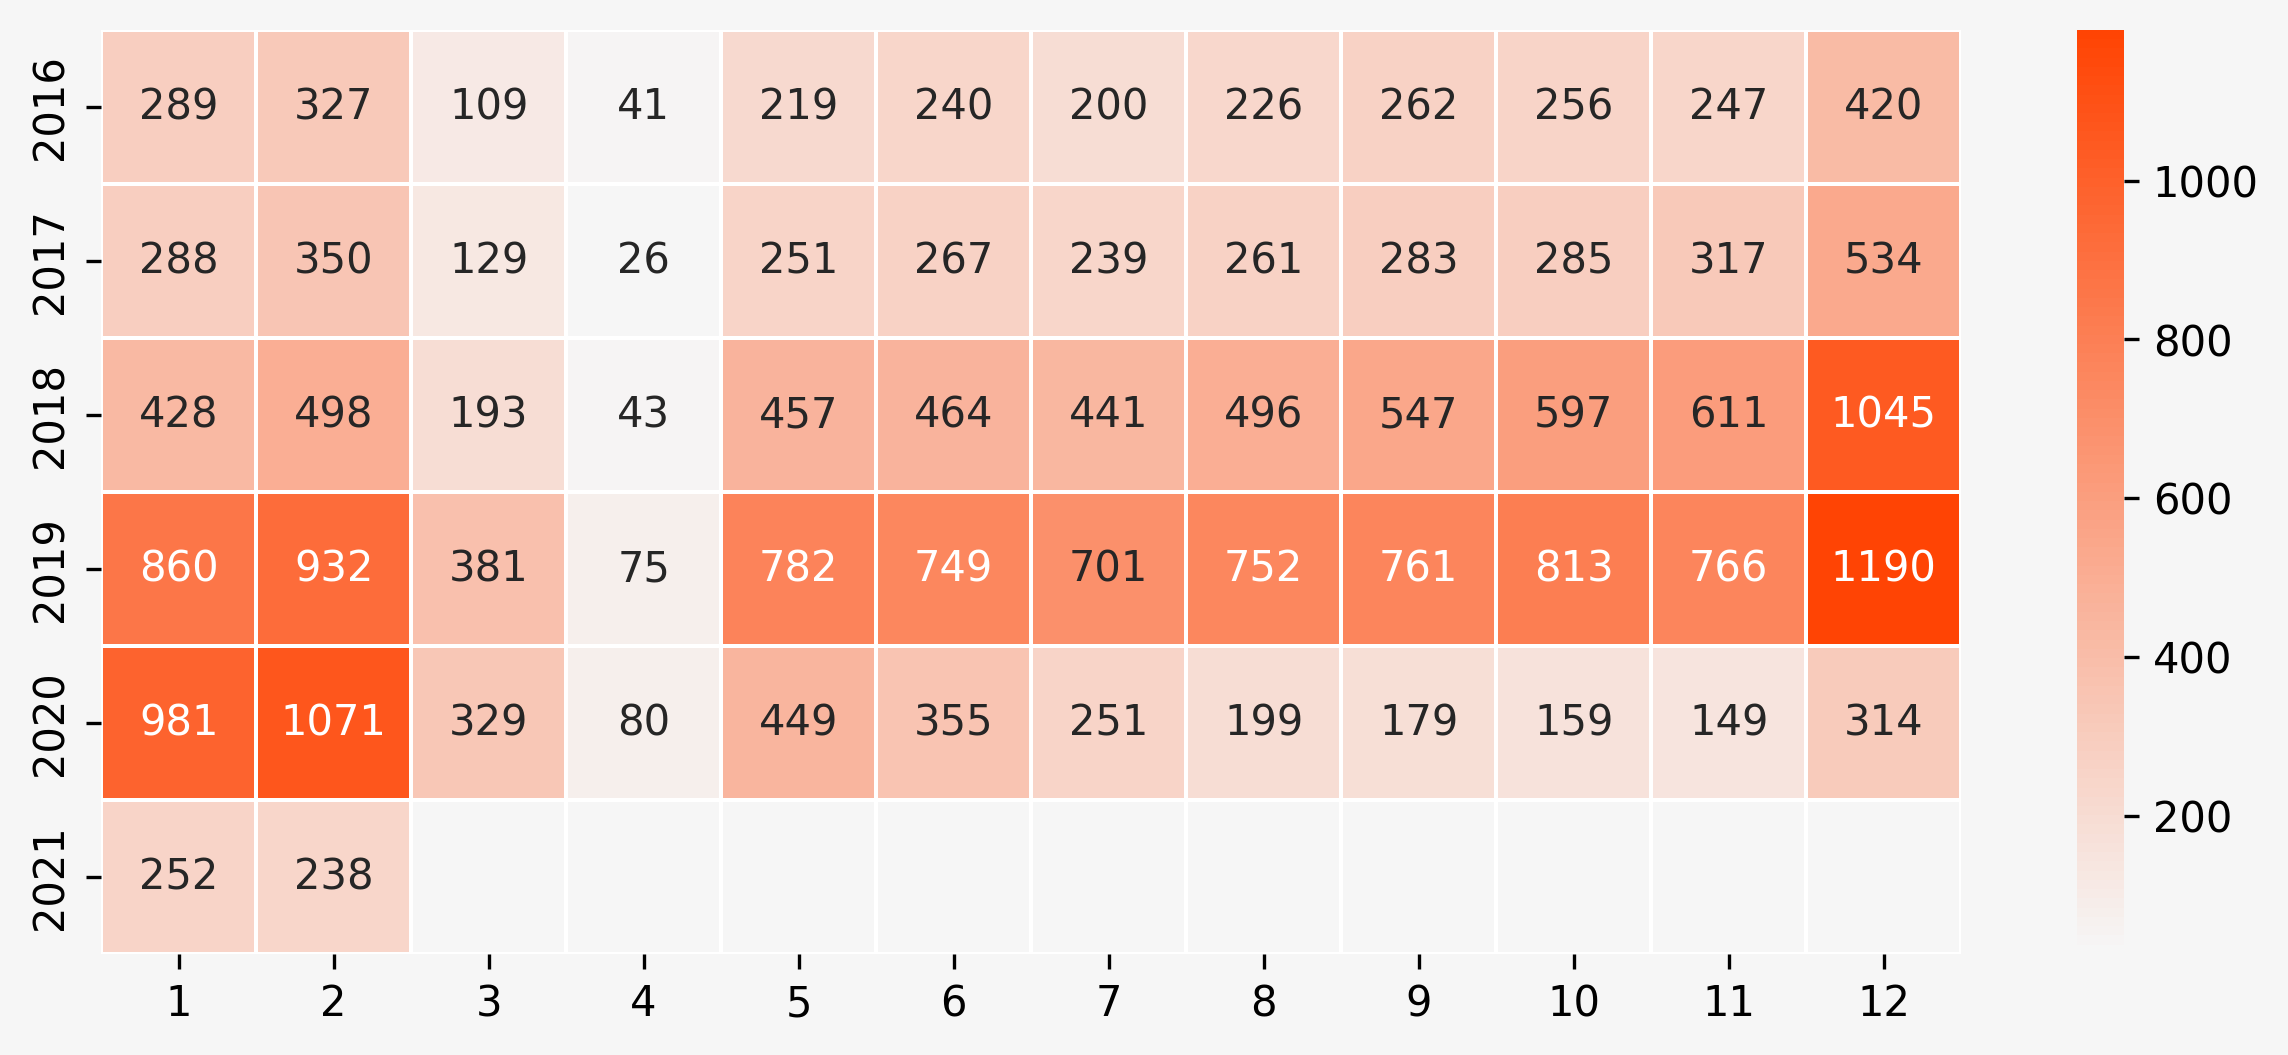

In [ ]:
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month

monthly_orders = df.groupby(['Year', 'Month'])['CustomerKey'].nunique().reset_index()
pivot_orders = monthly_orders.pivot(index='Year', columns='Month', values='CustomerKey')

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('custom', ['#f6f6f6', '#ff4404'], N = 100)

ax = plt.figure(figsize=(10, 4) , dpi = 300)
ax.patch.set_facecolor('#f6f6f6')
ax = sns.heatmap(pivot_orders, annot = True, cmap = cmap, fmt = 'g', linewidths = .5)
plt.xlabel('')
plt.ylabel('')

ax.set_facecolor('#f6f6f6')
plt.show()

**CUSTOMER DEMOGRAPHIC**

In [ ]:
df_gender = df.groupby('Gender', as_index=False).agg(
    Total_Customers = ('CustomerKey', 'nunique'),
    Total_Orders = ('Order_Number', 'nunique'),
    Revenue = ('Amount', 'sum')
)

df_gender.columns = ['Gender', 'Total Customers', 'Total Orders', 'Revenue']
df_gender['Revenue'] = df_gender['Revenue'].round(0).astype(int)

df_gender

,Gender,Total Customers,Total Orders,Revenue
0,Female,5858,12970,27420625
1,Male,6029,13356,28334855


In [ ]:
df['Age'] = 2021 - df['Birthday'].dt.year

In [ ]:
def classify_age_group(age):

    if age < 25:
        return 'Young Adults'
    elif age < 35:
        return 'Adult'
    elif age < 45:
        return 'Middle-aged'
    elif age < 54:
        return 'Midlife'
    elif age < 65:
        return 'Senior'
    else:
        return "Elderly"

df['Age Group'] = df['Age'].apply(classify_age_group)

df.head()

,Order_Number,Line_Item,Order_Date,CustomerKey,Gender,Name,Customer_City,Customer_State,Customer_Country,Continent,...,SubcategoryKey,Subcategory,CategoryKey,Category,Quantity,Amount,Cost,Profit,Age,Age Group
0,366000,1,2016-01-01,265598,Male,Tyler Vaught,London,Ontario,Canada,North America,...,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,1,68.00,31.27,36.73,50,Midlife
1,366001,1,2016-01-01,1269051,Male,Frank Upchurch,Auberry,California,United States,North America,...,402,Digital SLR Cameras,4,Cameras and camcorders,2,854.00,282.94,571.06,26,Adult
2,366001,2,2016-01-01,1269051,Male,Frank Upchurch,Auberry,California,United States,North America,...,803,Microwaves,8,Home Appliances,1,665.94,220.64,445.30,26,Adult
3,366002,1,2016-01-01,266019,Female,Joan Roche,Red Deer,Alberta,Canada,North America,...,402,Digital SLR Cameras,4,Cameras and camcorders,7,2254.00,1036.56,1217.44,59,Senior
4,366002,2,2016-01-01,266019,Female,Joan Roche,Red Deer,Alberta,Canada,North America,...,301,Laptops,3,Computers,1,326.00,166.20,159.80,59,Senior


In [ ]:
df_age_group = df.groupby('Age Group', as_index=False).agg(
    Total_Customers = ('CustomerKey', 'nunique'),
    Total_Orders = ('Order_Number', 'nunique'),
    Revenue = ('Amount', 'sum')
)

df_age_group.columns = ['Age Group', 'Total Customers', 'Total Orders', 'Revenue']
df_age_group['Revenue'] = df_age_group['Revenue'].round(0).astype(int)

df_age_group

,Age Group,Total Customers,Total Orders,Revenue
0,Adult,1774,3888,8420602
1,Elderly,3836,8507,18111845
2,Middle-aged,1798,3959,8482220
3,Midlife,1585,3518,7354689
4,Senior,1952,4317,8877479
5,Young Adults,942,2137,4508644


In [ ]:
df['Customer_City'] = df['Customer_City'].str.title()

df_location = df.groupby(['Customer_Country', 'Customer_State', 'Customer_City'], as_index=False).agg(
    Total_Customers = ('CustomerKey', 'nunique'),
    Total_Orders = ('Order_Number', 'nunique'),
    Revenue = ('Amount', 'sum')
)

df_location.columns = ['Country', 'State', 'City', 'Total Customers', 'Total Orders', 'Revenue']
df_location['Revenue'] = df_location['Revenue'].round(0).astype(int)


df_location.head()

,Country,State,City,Total Customers,Total Orders,Revenue
0,Australia,Australian Capital Territory,Melba,1,1,571
1,Australia,Australian Capital Territory,Torrens,1,1,4563
2,Australia,Australian Capital Territory,Waramanga,1,2,14783
3,Australia,New South Wales,Alexandria,1,1,1425
4,Australia,New South Wales,Alison,1,1,1360


In [ ]:
df_product = df.groupby('Category', as_index=False).agg(
    Total_Orders = ('Order_Number', 'nunique'),
    Revenue = ('Amount', 'sum')
)

df_product.columns = ['Category', 'Total Orders', 'Revenue']

df_product['Revenue'] = df_product['Revenue'].round(0).astype(int)

df_product

,Category,Total Orders,Revenue
0,Audio,6625,3169628
1,Cameras and camcorders,4995,6520168
2,Cell phones,8442,6183791
3,Computers,10990,19301595
4,Games and Toys,6128,724829
5,Home Appliances,5195,10795479
6,"Music, Movies and Audio Books",7784,3131006
7,TV and Video,3325,5928983


In [ ]:
df_subcategory = df.groupby('Subcategory', as_index=False).agg(
    Total_Orders = ('Order_Number', 'nunique'),
    Revenue = ('Amount', 'sum')
)

df_subcategory.columns = ['Subcategory', 'Total Orders', 'Revenue']

df_subcategory['Revenue'] = df_subcategory['Revenue'].round(0).astype(int)

df_subcategory

,Subcategory,Total Orders,Revenue
0,Air Conditioners,309,333585
1,Bluetooth Headphones,4013,1380401
2,Boxed Games,3202,91951
3,Camcorders,1363,3357990
4,Cameras & Camcorders Accessories,1379,381857
5,Car Video,430,587888
6,Cell phones Accessories,1668,128948
7,Coffee Machines,717,1167740
8,Computers Accessories,1465,211346
9,Desktops,5751,9906356


In [ ]:
df['Channel'] = np.where(df['Store_Country'] == 'Online', 'Online', 'Offline')

df_channel = df.groupby(['Channel', 'Store_Country'], as_index=False).agg(
    Total_Orders = ('Order_Number', 'nunique'),
    Revenue = ('Amount', 'sum')
)

df_channel.columns = ['Channel', 'Store', 'Total Orders', 'Revenue']
df_channel['AOV'] = df_channel['Revenue'] / df_channel['Total Orders']
df_channel['Revenue'] = df_channel['Revenue'].round(0).astype(int)
df_channel['AOV'] = df_channel['AOV'].round(0).astype(int)

df_channel.sort_values(by = 'AOV', ascending = False)

,Channel,Store,Total Orders,Revenue,AOV
0,Offline,Australia,901,2099141,2330
4,Offline,Italy,890,2059087,2314
3,Offline,Germany,1902,4246279,2233
2,Offline,France,571,1229546,2153
7,Offline,United States,11153,23764426,2131
6,Offline,United Kingdom,2784,5749770,2065
5,Offline,Netherlands,776,1591344,2051
8,Online,Online,5580,11404325,2044
1,Offline,Canada,1769,3611562,2042


In [ ]:
store = pd.read_csv('Stores.csv')
store['Open Date'] = pd.to_datetime(store['Open Date'], format = '%m/%d/%Y')
store.loc[store[store['State'] != 'Online'].groupby('Country')['Open Date'].idxmin()].sort_values(by = 'Open Date')

,StoreKey,Country,State,Square Meters,Open Date
8,9,Canada,Northwest Territories,1500.0,2005-03-04
36,37,United Kingdom,Ayrshire,2100.0,2005-03-04
59,60,United States,Rhode Island,1260.0,2005-04-04
34,35,Netherlands,Zeeland,1225.0,2007-05-07
16,17,France,Martinique,350.0,2007-07-08
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
28,29,Italy,Enna,1000.0,2008-01-01
21,22,Germany,Freistaat Thüringen,2000.0,2008-03-06


In [ ]:
store_counts = store.groupby('Country')['StoreKey'].nunique().reset_index()
store_counts.columns = ['Country', 'Total Stores']
store_counts

,Country,Total Stores
0,Australia,6
1,Canada,5
2,France,7
3,Germany,9
4,Italy,3
5,Netherlands,5
6,Online,1
7,United Kingdom,7
8,United States,24


In [ ]:
df.columns

Index(['Order_Number', 'Line_Item', 'Order_Date', 'CustomerKey', 'Gender',
       'Name', 'Customer_City', 'Customer_State', 'Customer_Country',
       'Continent', 'Birthday', 'StoreKey', 'Store_Country', 'Store_State',
       'Square_Meters', 'Open_Date', 'ProductKey', 'Product_Name', 'Brand',
       'Color', 'Unit_Cost_USD', 'Unit_Price_USD', 'SubcategoryKey',
       'Subcategory', 'CategoryKey', 'Category', 'Quantity', 'Amount', 'Cost',
       'Profit', 'Age', 'Age Group'],
      dtype='object')

In [ ]:
online_customer = df[df['Store_Country'] == 'Online'].groupby('Customer_Country')['CustomerKey'].nunique().sort_values(ascending = False).reset_index()
online_customer.columns = ['Country', 'Online Customers']
online_customer

,Country,Online Customers
0,United States,2409
1,United Kingdom,545
2,Germany,443
3,Canada,427
4,Australia,258
5,Italy,179
6,Netherlands,167
7,France,119


In [ ]:
online_customer = df.groupby('Customer_Country').agg(
    Total_Customers=('CustomerKey', 'nunique'),
    Online_Customers=('CustomerKey', lambda x: x[df['Store_Country'] == 'Online'].nunique())
).reset_index()

online_customer['Online Customer Percentage'] = (online_customer['Online_Customers'] / online_customer['Total_Customers'])

online_customer = online_customer.sort_values(by='Online_Customers', ascending=False).reset_index(drop=True)
online_customer.columns = ['Country', 'Total Customers', 'Online Customers', 'Online Customer Percentage']

online_customer

,Country,Total Customers,Online Customers,Online Customer Percentage
0,United States,5706,2409,0.422187
1,United Kingdom,1570,545,0.347134
2,Germany,1150,443,0.385217
3,Canada,1179,427,0.362171
4,Australia,780,258,0.330769
5,Italy,530,179,0.337736
6,Netherlands,534,167,0.312734
7,France,438,119,0.271689


# **COHORT**

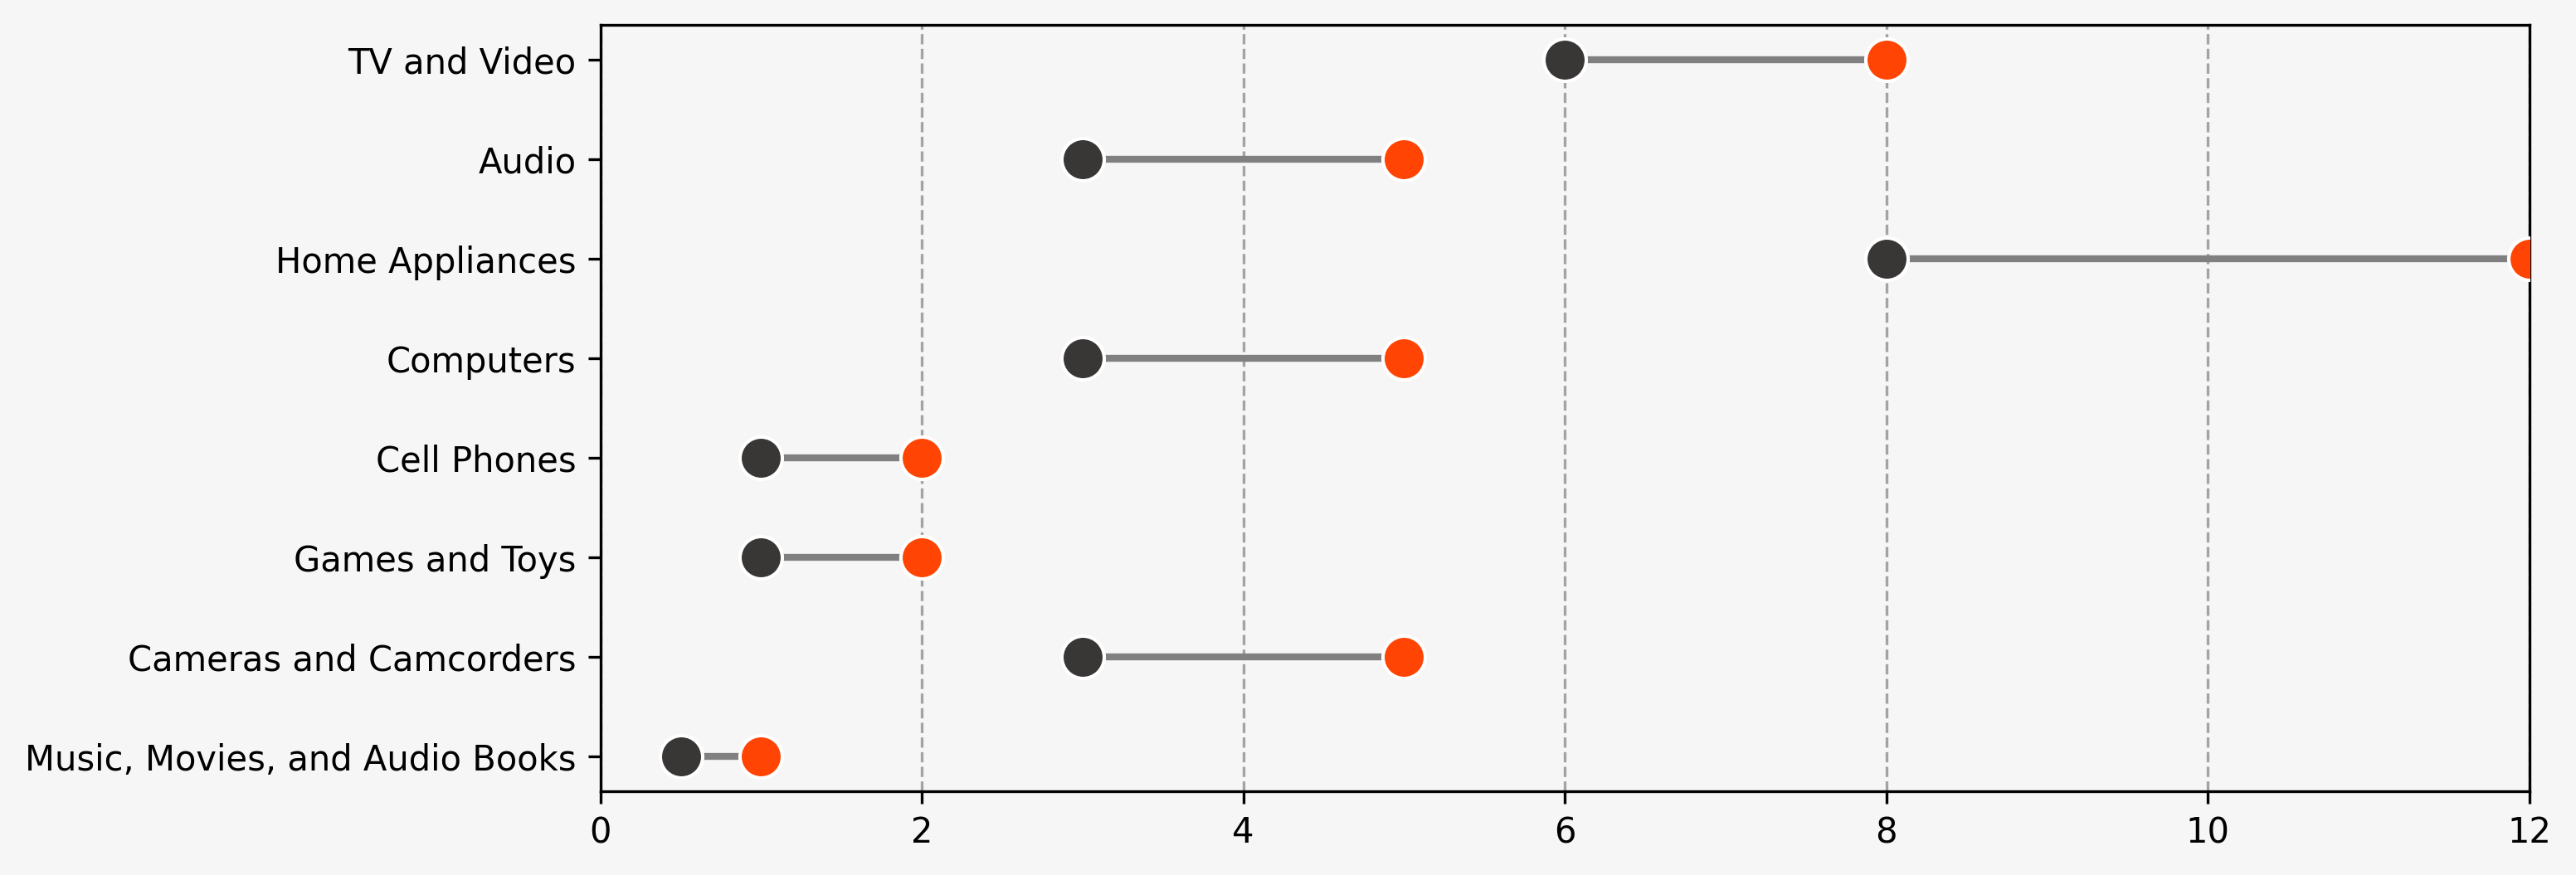

In [ ]:
data = {
    "Category": ["TV and Video", "Audio", "Home Appliances", "Computers", "Cell Phones",
                 "Games and Toys", "Cameras and Camcorders", "Music, Movies, and Audio Books"],
    "Min_Lifespan": [6, 3, 8, 3, 1, 1, 3, 0.5],
    "Max_Lifespan": [8, 5, 12, 5, 2, 2, 5, 1]
}

kk = pd.DataFrame(data)

ax = plt.figure(figsize=(10, 4), facecolor = '#f6f6f6', dpi = 300)

for i in range(len(df)):
    plt.plot([df["Min_Lifespan"][i], df["Max_Lifespan"][i]], [i, i], color='grey', linestyle='-', linewidth=2)

ax1 = sns.scatterplot(x = "Min_Lifespan", y = "Category", data = kk, color = '#393636', s = 150, label = 'Min Lifespan', zorder = 3)
ax2 = sns.scatterplot(x = "Max_Lifespan", y = "Category", data = kk, color = '#ff4404', s = 150, label = 'Max Lifespan', zorder = 3)

plt.title('', color = '#393636')
plt.xlabel('', color = '#393636')
plt.ylabel('', color = '#393636')
ax1.set_facecolor('#f6f6f6')
ax2.set_facecolor('#f6f6f6')

plt.grid(axis='x', linestyle='--', alpha=0.7, color='grey')
plt.legend().set_visible(False)
plt.xlim(0, 12)
plt.show()

In [ ]:
df.columns

Index(['Order_Number', 'Line_Item', 'Order_Date', 'CustomerKey', 'Gender',
       'Name', 'Customer_City', 'Customer_State', 'Customer_Country',
       'Continent', 'Birthday', 'StoreKey', 'Store_Country', 'Store_State',
       'Square_Meters', 'Open_Date', 'ProductKey', 'Product_Name', 'Brand',
       'Color', 'Unit_Cost_USD', 'Unit_Price_USD', 'SubcategoryKey',
       'Subcategory', 'CategoryKey', 'Category', 'Quantity', 'Amount', 'Cost',
       'Profit', 'Age', 'Age Group'],
      dtype='object')

In [ ]:
cohort = df[['CustomerKey', 'Order_Date']]
cohort['First_Order_Date'] = cohort.groupby("CustomerKey")["Order_Date"].transform("min")
cohort

,CustomerKey,Order_Date,First_Order_Date
0,265598,2016-01-01,2016-01-01
1,1269051,2016-01-01,2016-01-01
2,1269051,2016-01-01,2016-01-01
3,266019,2016-01-01,2016-01-01
4,266019,2016-01-01,2016-01-01
...,...,...,...
62879,1216913,2021-02-20,2019-09-18
62880,511229,2021-02-20,2018-10-18
62881,331277,2021-02-20,2018-05-07
62882,331277,2021-02-20,2018-05-07


In [ ]:
cohort.iloc[:, 1] = cohort.iloc[:, 1].dt.strftime('%Y-%m')
cohort.iloc[:, 2] = cohort.iloc[:, 2].dt.strftime('%Y-%m')

In [ ]:
year_diff = cohort['Order_Date'].dt.year - cohort['First_Order_Date'].dt.year
month_diff = cohort['Order_Date'].dt.month - cohort['First_Order_Date'].dt.month
cohort["Month_Diff"] = year_diff * 12 + month_diff

cohort

,CustomerKey,Order_Date,First_Order_Date,Month_Diff
0,265598,2016-01-01,2016-01-01,0
1,1269051,2016-01-01,2016-01-01,0
2,1269051,2016-01-01,2016-01-01,0
3,266019,2016-01-01,2016-01-01,0
4,266019,2016-01-01,2016-01-01,0
...,...,...,...,...
62879,1216913,2021-02-01,2019-09-01,17
62880,511229,2021-02-01,2018-10-01,28
62881,331277,2021-02-01,2018-05-01,33
62882,331277,2021-02-01,2018-05-01,33


In [ ]:
cohort.duplicated().sum()

37230

In [ ]:
cohort = cohort.drop_duplicates()

In [ ]:
bins = list(range(0, cohort["Month_Diff"].max() + 6, 6))
cohort["Month_Diff"] = pd.cut(cohort["Month_Diff"], bins, labels = False, right = False)

In [ ]:
def get_cohort_start_month(order_date, start_date, period_months = 6):
    months_diff = (order_date.year - start_date.year) * 12 + order_date.month - start_date.month
    bin_start = (months_diff // period_months) * period_months
    cohort_start = start_date + pd.DateOffset(months = bin_start)
    return cohort_start

cohort['Cohort_Month_Start'] = cohort['First_Order_Date'].apply(lambda x: get_cohort_start_month(x, cohort['First_Order_Date'].min()))
cohort

,CustomerKey,Order_Date,First_Order_Date,Month_Diff,Cohort_Month_Start
0,265598,2016-01-01,2016-01-01,0,2016-01-01
1,1269051,2016-01-01,2016-01-01,0,2016-01-01
3,266019,2016-01-01,2016-01-01,0,2016-01-01
6,1107461,2016-01-01,2016-01-01,0,2016-01-01
8,844003,2016-01-01,2016-01-01,0,2016-01-01
...,...,...,...,...,...
62872,1728060,2021-02-01,2017-12-01,6,2017-07-01
62873,887764,2021-02-01,2016-12-01,8,2016-07-01
62879,1216913,2021-02-01,2019-09-01,2,2019-07-01
62880,511229,2021-02-01,2018-10-01,4,2018-07-01


In [ ]:
cohort = cohort.drop(['First_Order_Date', 'Order_Date'], axis = 1)
cohort.columns = ['Customer Key', 'Cohort Index', 'Cohort Month']
cohort.head()

,Customer Key,Cohort Index,Cohort Month
0,265598,0,2016-01-01
1,1269051,0,2016-01-01
3,266019,0,2016-01-01
6,1107461,0,2016-01-01
8,844003,0,2016-01-01


In [ ]:
cohort['Cohort Index'].max()

10

In [ ]:
print(cohort['Cohort Month'].min(), '-', cohort['Cohort Month'].max())

2016-01-01 00:00:00 - 2021-01-01 00:00:00


In [ ]:
cohort = (cohort.groupby(['Cohort Month', 'Cohort Index'])['Customer Key'].apply(pd.Series.nunique).reset_index())
cohort.columns = ['Cohort Month', 'Cohort Index', 'Total Customers']
cohort

,Cohort Month,Cohort Index,Total Customers
0,2016-01-01,0,1182
1,2016-01-01,1,137
2,2016-01-01,2,135
3,2016-01-01,3,178
4,2016-01-01,4,187
...,...,...,...
61,2020-01-01,1,41
62,2020-01-01,2,8
63,2020-07-01,0,242
64,2020-07-01,1,3


In [ ]:
cohort = cohort.pivot(index = 'Cohort Month', columns = 'Cohort Index', values = 'Total Customers')
cohort

Cohort Index,0,1,2,3,4,5,6,7,8,9,10
Cohort Month,,,,,,,,,,,
2016-01-01,1182.0,137.0,135.0,178.0,187.0,301.0,281.0,369.0,158.0,86.0,15.0
2016-07-01,1379.0,134.0,191.0,242.0,363.0,351.0,407.0,180.0,111.0,10.0,NaN
2017-01-01,1027.0,149.0,172.0,266.0,278.0,293.0,148.0,83.0,13.0,NaN,NaN
2017-07-01,1349.0,229.0,339.0,359.0,380.0,158.0,108.0,9.0,NaN,NaN,NaN
2018-01-01,1249.0,318.0,294.0,365.0,182.0,110.0,11.0,NaN,NaN,NaN,NaN
2018-07-01,1855.0,445.0,558.0,234.0,120.0,21.0,NaN,NaN,NaN,NaN,NaN
2019-01-01,1428.0,424.0,195.0,104.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01,1404.0,178.0,95.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,705.0,41.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_size_monthly = cohort.iloc[:, 0]
retention_monthly = cohort.divide(cohort_size_monthly, axis = 0)
retention_monthly

Cohort Index,0,1,2,3,4,5,6,7,8,9,10
Cohort Month,,,,,,,,,,,
2016-01-01,1.0,0.115905,0.114213,0.150592,0.158206,0.254653,0.237733,0.312183,0.133672,0.072758,0.01269
2016-07-01,1.0,0.097172,0.138506,0.175489,0.263234,0.254532,0.295141,0.130529,0.080493,0.007252,NaN
2017-01-01,1.0,0.145083,0.167478,0.259007,0.270691,0.285297,0.144109,0.080818,0.012658,NaN,NaN
2017-07-01,1.0,0.169755,0.251297,0.266123,0.281690,0.117124,0.080059,0.006672,NaN,NaN,NaN
2018-01-01,1.0,0.254604,0.235388,0.292234,0.145717,0.088070,0.008807,NaN,NaN,NaN,NaN
2018-07-01,1.0,0.239892,0.300809,0.126146,0.064690,0.011321,NaN,NaN,NaN,NaN,NaN
2019-01-01,1.0,0.296919,0.136555,0.072829,0.007703,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01,1.0,0.126781,0.067664,0.006410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,1.0,0.058156,0.011348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
empty_column = pd.Series([0] * len(cohort), name = 'Total Customers')

retention_monthly.insert(loc = 0, column = 'T.Cust', value = empty_column)
retention_monthly

Cohort Index,T.Cust,0,1,2,3,4,5,6,7,8,9,10
Cohort Month,,,,,,,,,,,,
2016-01-01,NaN,1.0,0.115905,0.114213,0.150592,0.158206,0.254653,0.237733,0.312183,0.133672,0.072758,0.01269
2016-07-01,NaN,1.0,0.097172,0.138506,0.175489,0.263234,0.254532,0.295141,0.130529,0.080493,0.007252,NaN
2017-01-01,NaN,1.0,0.145083,0.167478,0.259007,0.270691,0.285297,0.144109,0.080818,0.012658,NaN,NaN
2017-07-01,NaN,1.0,0.169755,0.251297,0.266123,0.281690,0.117124,0.080059,0.006672,NaN,NaN,NaN
2018-01-01,NaN,1.0,0.254604,0.235388,0.292234,0.145717,0.088070,0.008807,NaN,NaN,NaN,NaN
2018-07-01,NaN,1.0,0.239892,0.300809,0.126146,0.064690,0.011321,NaN,NaN,NaN,NaN,NaN
2019-01-01,NaN,1.0,0.296919,0.136555,0.072829,0.007703,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01,NaN,1.0,0.126781,0.067664,0.006410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,NaN,1.0,0.058156,0.011348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


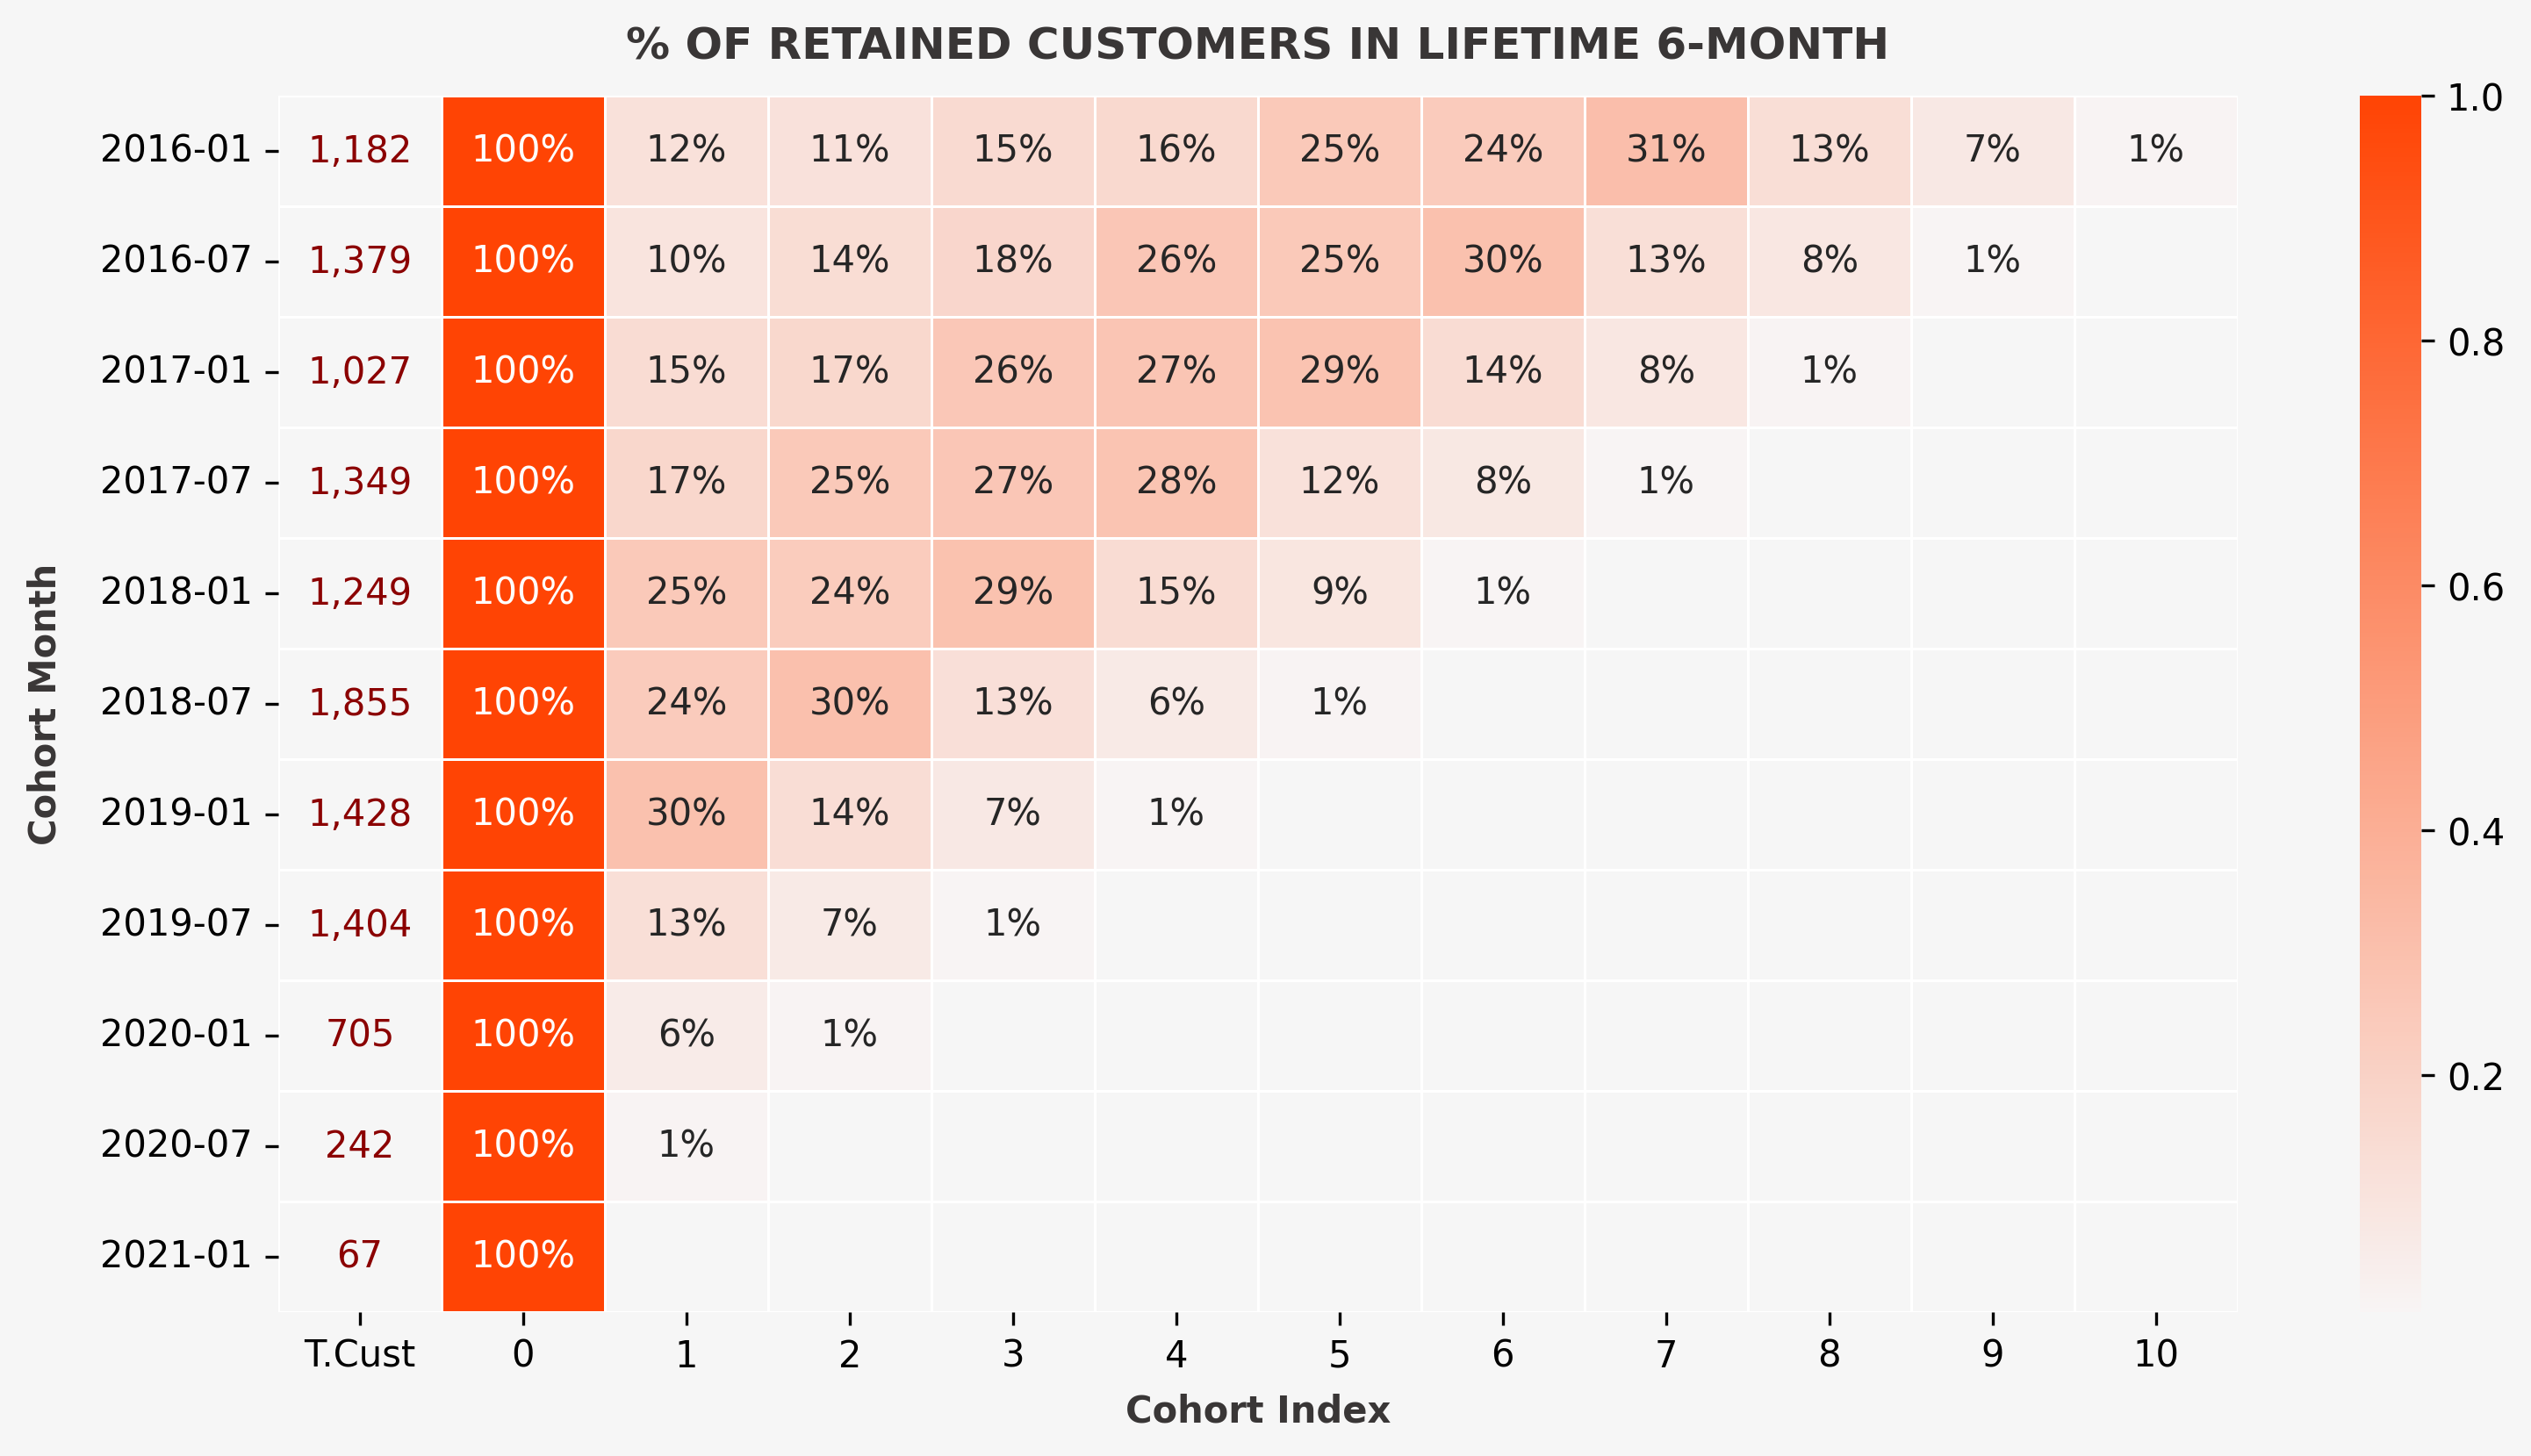

In [ ]:
cohort_labels = cohort.index.strftime('%Y-%m')
plt.figure(figsize = (12, 6), facecolor = '#f6f6f6', dpi = 300)

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list("custom", ["#f8f4f4", "#ff4404"], N=256)

ax = sns.heatmap(data = retention_monthly,
            cmap = cmap,
            annot = True,
            fmt = '.0%',
            linewidths = 0.25)

for i in range(len(cohort)):
    plt.text(0.5, i + 0.5,
            '{:,.0f}'.format(cohort.iloc[i, 0]),
            ha='center',
            va='center',
            color = 'darkred')

plt.title('% OF RETAINED CUSTOMERS IN LIFETIME 6-MONTH', color = "#393636", fontweight = "bold", fontsize = 12, pad = 10)
plt.xlabel('Cohort Index', color = "#393636", fontweight = "bold", fontsize = 10, labelpad = 5)
plt.ylabel('Cohort Month', color = "#393636", fontweight = "bold", fontsize = 10, labelpad = 10)

plt.gca().set_yticklabels(cohort_labels, rotation = 0, fontsize = 10)
ax.set_facecolor('#f6f6f6')

plt.show()

In [ ]:
def define_6_month_period(date):
    if date.month <= 6:
        return pd.Timestamp(year = date.year, month = 1, day = 1)
    else:
        return pd.Timestamp(year = date.year, month = 7, day = 1)

df['Year-Month'] = df['Order_Date'].apply(define_6_month_period)

df_time = df.groupby('Year-Month', as_index=False).agg(
    Total_Orders = ('Order_Number', 'nunique'),
    Revenue = ('Amount', 'sum')
)

df_time.columns = ['Month', 'Total Orders', 'Revenue']

df_time

,Month,Total Orders,Revenue
0,2016-01-01,1239,3104587.53
1,2016-07-01,1626,3842206.03
2,2017-01-01,1331,3058459.91
3,2017-07-01,1949,4362962.36
4,2018-01-01,2126,4814237.63
5,2018-07-01,3839,7974723.03
6,2019-01-01,3900,8038887.81
7,2019-07-01,5183,10225494.67
8,2020-01-01,3375,6830873.31
9,2020-07-01,1260,2463758.83


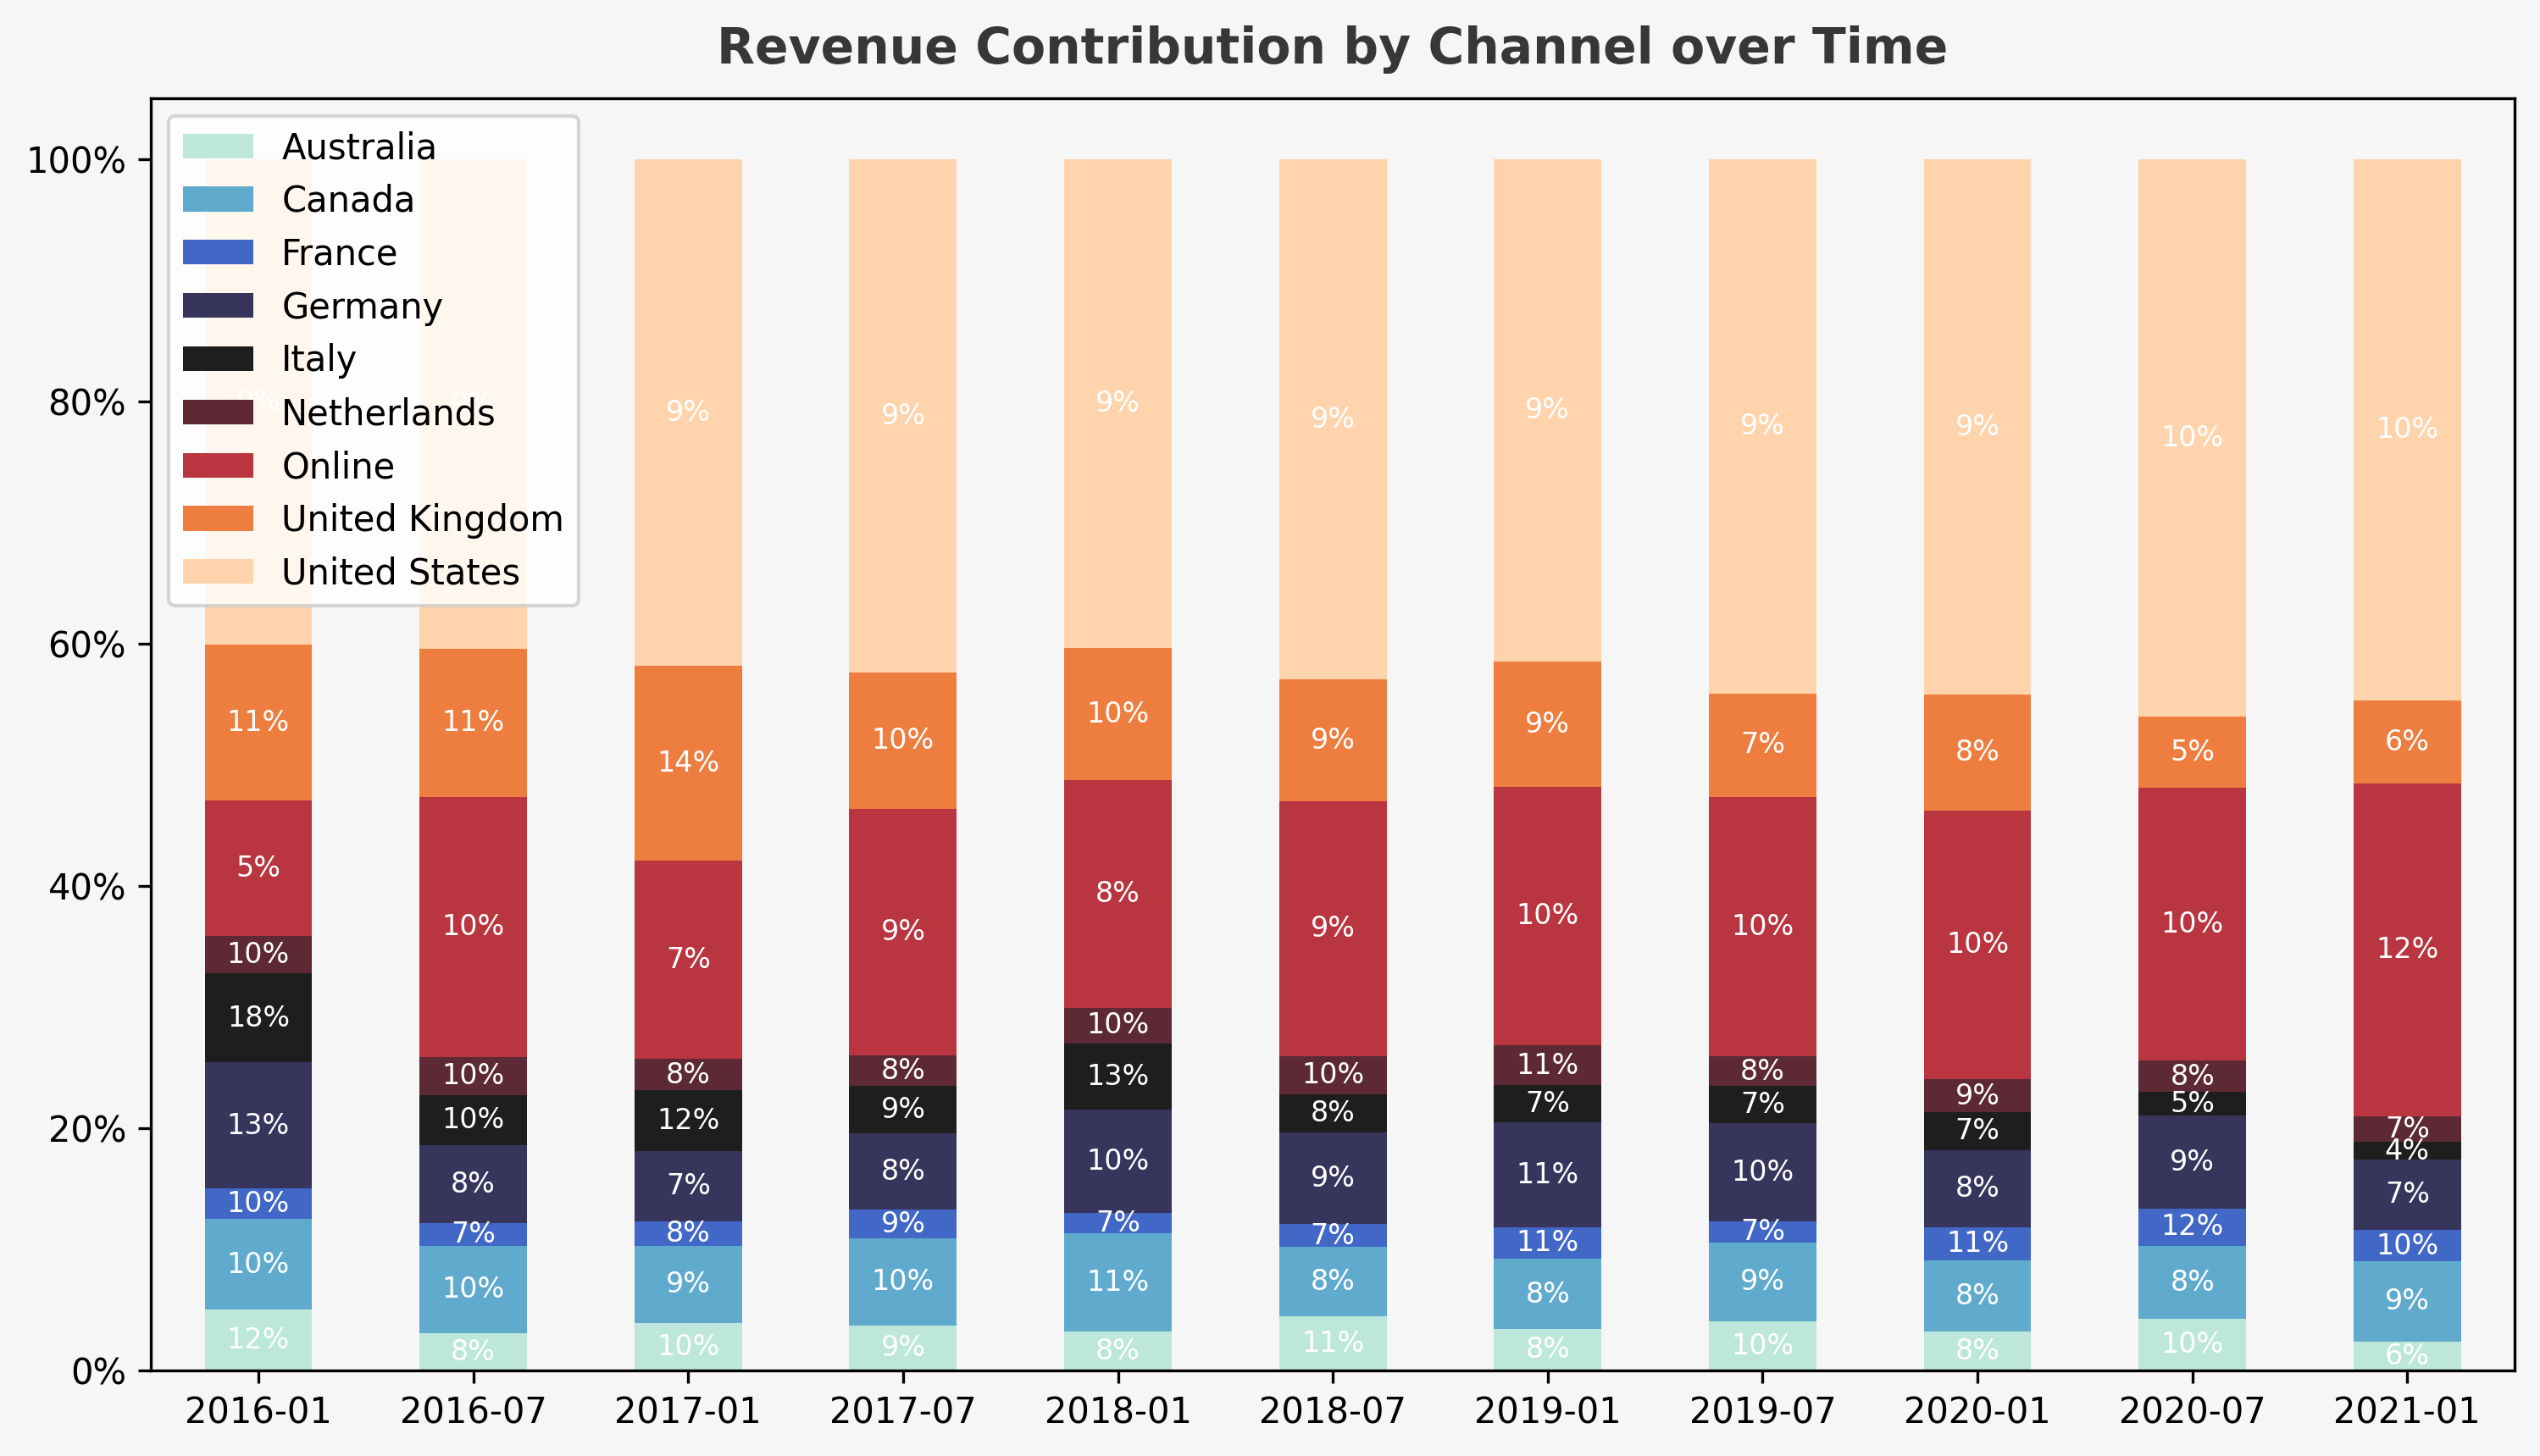

In [ ]:
df_channel = df.groupby(['Year-Month', 'Store_Country'], as_index=False).agg(Revenue = ('Amount', 'sum'))
df_channel.columns = ['Year-Month', 'Channel', 'Revenue']

df_channel_pivot = df_channel.pivot(index = 'Year-Month', columns = 'Channel', values = 'Revenue')
df_channel_pivot.index = pd.to_datetime(df_channel_pivot.index)
time_labels = df_channel_pivot.index.to_series().dt.strftime('%Y-%m')

fig, ax = plt.subplots(figsize=(12, 6.5), facecolor = '#f6f6f6', dpi = 300)

df_channel_pivot_normalized = df_channel_pivot.div(df_channel_pivot.sum(axis=1), axis=0)

bars = df_channel_pivot_normalized.plot(kind='bar', stacked=True, ax=ax, rot=0, colormap='icefire')

ax.set_title('Revenue Contribution by Channel over Time', fontsize=14, fontweight='bold', color='#393636', pad=10)
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_xticks(ticks=range(len(time_labels)), labels=time_labels, rotation=0)

from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

for bar_container in bars.containers:
    total_height = 0
    for bar in bar_container.patches:
        height = bar.get_height()
        total_height += height

    for bar in bar_container.patches:
        percentage = bar.get_height() / total_height
        ax.annotate('{:.0%}'.format(percentage),
                    xy=(bar.get_x() + bar.get_width()/2, bar.get_y() + bar.get_height()/2),
                    xytext=(0, 0), textcoords="offset points", ha='center', va='center', fontsize=8, color='white')

bars.set_facecolor('#f6f6f6')
bars.legend(loc='upper left')
plt.show()

# **RFM**

In [ ]:
rfm = df.groupby('CustomerKey').agg({
    'Order_Date': lambda x: (df['Order_Date'].max() - x.max()).days,
    'Order_Number':'nunique',
    'Amount':'sum'
}).reset_index()

rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,301,467,1,592.00
1,325,413,3,5787.67
2,554,443,2,951.71
3,1042,1082,1,1124.91
4,1314,1159,1,2539.86


In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11887 entries, 0 to 11886
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  11887 non-null  int64  
 1   Recency      11887 non-null  int64  
 2   Frequency    11887 non-null  int64  
 3   Monetary     11887 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 371.6 KB


In [ ]:
rfm['Customer ID'] = rfm['Customer ID'].astype(object)

In [ ]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,11887.0,614.142088,406.202795,0.00,366.000,508.0,795.000,1877.0
Frequency,11887.0,2.214688,1.391487,1.00,1.000,2.0,3.000,14.0
Monetary,11887.0,4690.458450,5197.622706,1.99,1138.915,2995.0,6425.065,61871.7


In [ ]:
px.scatter(rfm, x = "Recency", y = "Frequency", trendline = "ols", trendline_color_override = "red")

In [ ]:
px.scatter(rfm, x = "Frequency", y = "Monetary", trendline = "ols", trendline_color_override = "red")

In [ ]:
rfm[["Recency", "Frequency", "Monetary"]].corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.410268,-0.208927
Frequency,-0.410268,1.000000,0.566594
Monetary,-0.208927,0.566594,1.000000


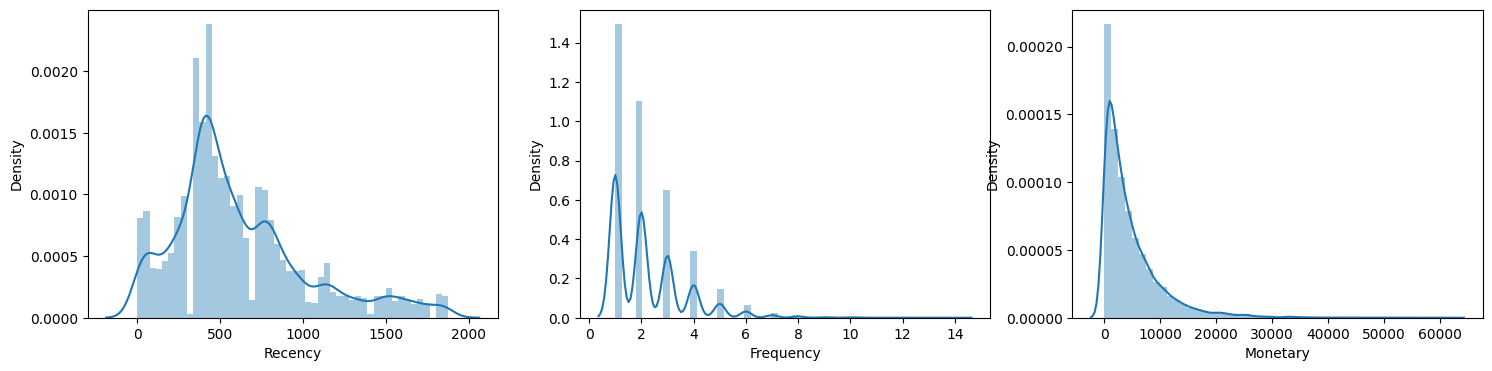

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 4))

sns.distplot(rfm.Recency, ax = ax[0])
sns.distplot(rfm.Frequency, ax = ax[1])
sns.distplot(rfm.Monetary, ax = ax[2])

plt.show()

In [ ]:
rfm["R-Score"] = pd.qcut(rfm["Recency"], q = 5, duplicates = 'drop')
rfm["F-Score"] = pd.qcut(rfm["Frequency"], q = 5, duplicates = 'drop')
rfm["M-Score"] = pd.qcut(rfm["Monetary"], q = 5, duplicates = 'drop')

In [ ]:
score = [rfm["R-Score"], rfm["F-Score"], rfm["M-Score"]]

for i in score:
  print(i.name, i.unique(), '\n')

R-Score [(432.0, 605.0], (343.0, 432.0], (876.0, 1877.0], (-0.001, 343.0], (605.0, 876.0]]
Categories (5, interval[float64, right]): [(-0.001, 343.0] < (343.0, 432.0] < (432.0, 605.0] <
                                           (605.0, 876.0] < (876.0, 1877.0]] 

F-Score [(0.999, 2.0], (2.0, 3.0], (3.0, 14.0]]
Categories (3, interval[float64, right]): [(0.999, 2.0] < (2.0, 3.0] < (3.0, 14.0]] 

M-Score [(1.989, 849.114], (4076.378, 7495.834], (849.114, 2160.982], (2160.982, 4076.378], (7495.834, 61871.7]]
Categories (5, interval[float64, right]): [(1.989, 849.114] < (849.114, 2160.982] <
                                           (2160.982, 4076.378] < (4076.378, 7495.834] <
                                           (7495.834, 61871.7]] 



In [ ]:
rfm["R-Score"] = pd.qcut(rfm["Recency"], q = 5, labels = [5,4,3,2,1], duplicates = 'drop')
rfm["F-Score"] = pd.qcut(rfm["Frequency"], q = 5, labels = [3,4,5], duplicates = 'drop')
rfm["M-Score"] = pd.qcut(rfm["Monetary"], q = 5, labels = [1,2,3,4,5], duplicates = 'drop')

In [ ]:
rfm["RFM Score"] = rfm["R-Score"].astype(str) + rfm["F-Score"].astype(str) + rfm["M-Score"].astype(str)
rfm.head()

,Customer ID,Recency,Frequency,Monetary,R-Score,F-Score,M-Score,RFM Score
0,301,467,1,592.00,3,3,1,331
1,325,413,3,5787.67,4,4,4,444
2,554,443,2,951.71,3,3,2,332
3,1042,1082,1,1124.91,1,3,2,132
4,1314,1159,1,2539.86,1,3,3,133


In [ ]:
rank = pd.read_csv('RankRFM.csv')

In [ ]:
rank["Scores"] = rank["Scores"].str.split(',')
rank = rank.explode("Scores").reset_index(drop = True)
rank["Scores"] = rank["Scores"].apply(str.strip)
rank.head()

,Segment,Scores
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454


In [ ]:
rfm = rfm.merge(rank, left_on = "RFM Score", right_on = "Scores", how = "left")
rfm

,Customer ID,Recency,Frequency,Monetary,R-Score,F-Score,M-Score,RFM Score,Segment,Scores
0,301,467,1,592.00,3,3,1,331,About To Sleep,331
1,325,413,3,5787.67,4,4,4,444,Loyal,444
2,554,443,2,951.71,3,3,2,332,Hibernating customers,332
3,1042,1082,1,1124.91,1,3,2,132,Hibernating customers,132
4,1314,1159,1,2539.86,1,3,3,133,At Risk,133
...,...,...,...,...,...,...,...,...,...,...
11882,2099383,266,3,3739.00,5,4,3,543,Loyal,543
11883,2099600,927,1,1270.84,1,3,2,132,Hibernating customers,132
11884,2099758,255,2,529.91,5,3,1,531,Potential Loyalist,531
11885,2099862,416,1,501.50,4,3,1,431,Potential Loyalist,431


In [ ]:
rfm[['Customer ID', 'Segment']].to_csv('rfm.csv', index = False)

In [ ]:
rfm[rfm['Segment'].isin(['Champions', 'Loyal', 'At Risk'])].groupby("Segment").agg(
    Total_Customers= ("Customer ID", "nunique"),
    Orders_Count = ("Frequency", "sum"),
    Revenue = ("Monetary", "sum")
).round(0).astype(int).reset_index()

,Segment,Total_Customers,Orders_Count,Revenue
0,At Risk,1943,3914,13080172
1,Champions,1605,7049,17785186
2,Loyal,1182,3746,10434403


In [ ]:
rfm[rfm['Segment'].isin(['Champions', 'Loyal', 'At Risk'])].groupby("Segment").agg(
    Recency = ("Recency", "mean"),
    Frequency = ("Frequency", "mean"),
    Monetary = ("Monetary", "mean")
).astype(int).reset_index()

,Segment,Recency,Frequency,Monetary
0,At Risk,989,2,6731
1,Champions,244,4,11081
2,Loyal,435,3,8827


# **CUSTOMER CLUSTERS ANALYSIS**

In [ ]:
df = df.merge(rfm[['Customer ID', 'Segment']], left_on = "CustomerKey", right_on = "Customer ID", how = "left")

In [ ]:
df = df.drop('Customer ID', axis = 1)
df.head()

,Order_Number,Line_Item,Order_Date,CustomerKey,Gender,Name,Customer_City,Customer_State,Customer_Country,Continent,...,CategoryKey,Category,Quantity,Amount,Cost,Profit,Age,Age Group,Channel,Segment
0,366000,1,2016-01-01,265598,Male,Tyler Vaught,London,Ontario,Canada,North America,...,4,Cameras and camcorders,1,68.00,31.27,36.73,50,Midlife,Offline,Potential Loyalist
1,366001,1,2016-01-01,1269051,Male,Frank Upchurch,Auberry,California,United States,North America,...,4,Cameras and camcorders,2,854.00,282.94,571.06,26,Adult,Online,Hibernating customers
2,366001,2,2016-01-01,1269051,Male,Frank Upchurch,Auberry,California,United States,North America,...,8,Home Appliances,1,665.94,220.64,445.30,26,Adult,Online,Hibernating customers
3,366002,1,2016-01-01,266019,Female,Joan Roche,Red Deer,Alberta,Canada,North America,...,4,Cameras and camcorders,7,2254.00,1036.56,1217.44,59,Senior,Online,At Risk
4,366002,2,2016-01-01,266019,Female,Joan Roche,Red Deer,Alberta,Canada,North America,...,3,Computers,1,326.00,166.20,159.80,59,Senior,Online,At Risk


In [ ]:
df.columns

Index(['Order_Number', 'Line_Item', 'Order_Date', 'CustomerKey', 'Gender',
       'Name', 'Customer_City', 'Customer_State', 'Customer_Country',
       'Continent', 'Birthday', 'StoreKey', 'Store_Country', 'Store_State',
       'Square_Meters', 'Open_Date', 'ProductKey', 'Product_Name', 'Brand',
       'Color', 'Unit_Cost_USD', 'Unit_Price_USD', 'SubcategoryKey',
       'Subcategory', 'CategoryKey', 'Category', 'Quantity', 'Amount', 'Cost',
       'Age', 'Age Group', 'Segment'],
      dtype='object')

In [ ]:
df_segment_gender = df[df['Segment'].isin(['Champions', 'Loyal', 'At Risk'])].groupby(['Segment', 'Gender'], as_index=False).agg(
    Revenue = ('Amount', 'sum'),
    Orders = ('Order_Number', 'nunique'),
    Total_Customers = ('CustomerKey', 'nunique'))

df_segment_gender['Revenue'] = df_segment_gender['Revenue'].round(0).astype(int)
df_segment_gender

,Segment,Gender,Revenue,Orders,Total_Customers
0,At Risk,Female,6468370,1904,946
1,At Risk,Male,6611802,2010,997
2,Champions,Female,8611178,3490,800
3,Champions,Male,9174007,3559,805
4,Loyal,Female,5174427,1889,589
5,Loyal,Male,5259976,1857,593


In [ ]:
df_segment_age = df[df['Segment'].isin(['Champions', 'Loyal', 'At Risk'])].groupby(['Segment', 'Age Group'], as_index=False).agg(
    Revenue = ('Amount', 'sum'),
    Orders = ('Order_Number', 'nunique'),
    Total_Customers = ('CustomerKey', 'nunique'))

df_segment_age['Revenue'] = df_segment_age['Revenue'].round(0).astype(int)
df_segment_age

,Segment,Age Group,Revenue,Orders,Total_Customers
0,At Risk,Adult,1855964,501,266
1,At Risk,Elderly,4173503,1273,627
2,At Risk,Middle-aged,1962570,605,300
3,At Risk,Midlife,1966950,570,275
4,At Risk,Senior,2123612,650,325
5,At Risk,Young Adults,997573,315,150
6,Champions,Adult,2620339,1044,239
7,Champions,Elderly,6004276,2268,513
8,Champions,Middle-aged,2718937,1104,259
9,Champions,Midlife,2170808,898,206


In [ ]:
df.columns

Index(['Order_Number', 'Line_Item', 'Order_Date', 'CustomerKey', 'Gender',
       'Name', 'Customer_City', 'Customer_State', 'Customer_Country',
       'Continent', 'Birthday', 'StoreKey', 'Store_Country', 'Store_State',
       'Square_Meters', 'Open_Date', 'ProductKey', 'Product_Name', 'Brand',
       'Color', 'Unit_Cost_USD', 'Unit_Price_USD', 'SubcategoryKey',
       'Subcategory', 'CategoryKey', 'Category', 'Quantity', 'Amount', 'Cost',
       'Profit', 'Age', 'Age Group', 'Segment'],
      dtype='object')

In [ ]:
df_segment_location = df[df['Segment'].isin(['Champions', 'Loyal', 'At Risk'])].groupby(['Segment', 'Continent', 'Customer_Country'], as_index=False).agg(
    Total_Customers = ('CustomerKey', 'nunique'))

df_segment_location

,Segment,Continent,Customer_Country,Total_Customers
0,At Risk,Australia,Australia,159
1,At Risk,Europe,France,66
2,At Risk,Europe,Germany,178
3,At Risk,Europe,Italy,123
4,At Risk,Europe,Netherlands,86
5,At Risk,Europe,United Kingdom,304
6,At Risk,North America,Canada,190
7,At Risk,North America,United States,837
8,Champions,Australia,Australia,25
9,Champions,Europe,France,23


In [ ]:
df_segment_location = df[df['Segment'].isin(['Champions', 'Loyal', 'At Risk'])].groupby(['Segment', 'Store_Country'], as_index=False).agg(
    Revenue = ('Amount', 'sum'),
    Orders = ('Order_Number', 'nunique'),
    Total_Customers = ('CustomerKey', 'nunique'))

df_segment_location['Revenue'] = df_segment_location['Revenue'].round(0).astype(int)
df_segment_location

,Segment,Store_Country,Revenue,Orders,Total_Customers
0,At Risk,Australia,808994,187,137
1,At Risk,Canada,954063,271,166
2,At Risk,France,333579,93,60
3,At Risk,Germany,1117576,287,165
4,At Risk,Italy,635475,191,113
5,At Risk,Netherlands,456725,122,78
6,At Risk,Online,2431392,785,674
7,At Risk,United Kingdom,1666426,519,282
8,At Risk,United States,4675942,1459,769
9,Champions,Australia,181473,65,25


In [ ]:
df = pd.read_csv('aggregate.csv')

In [ ]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

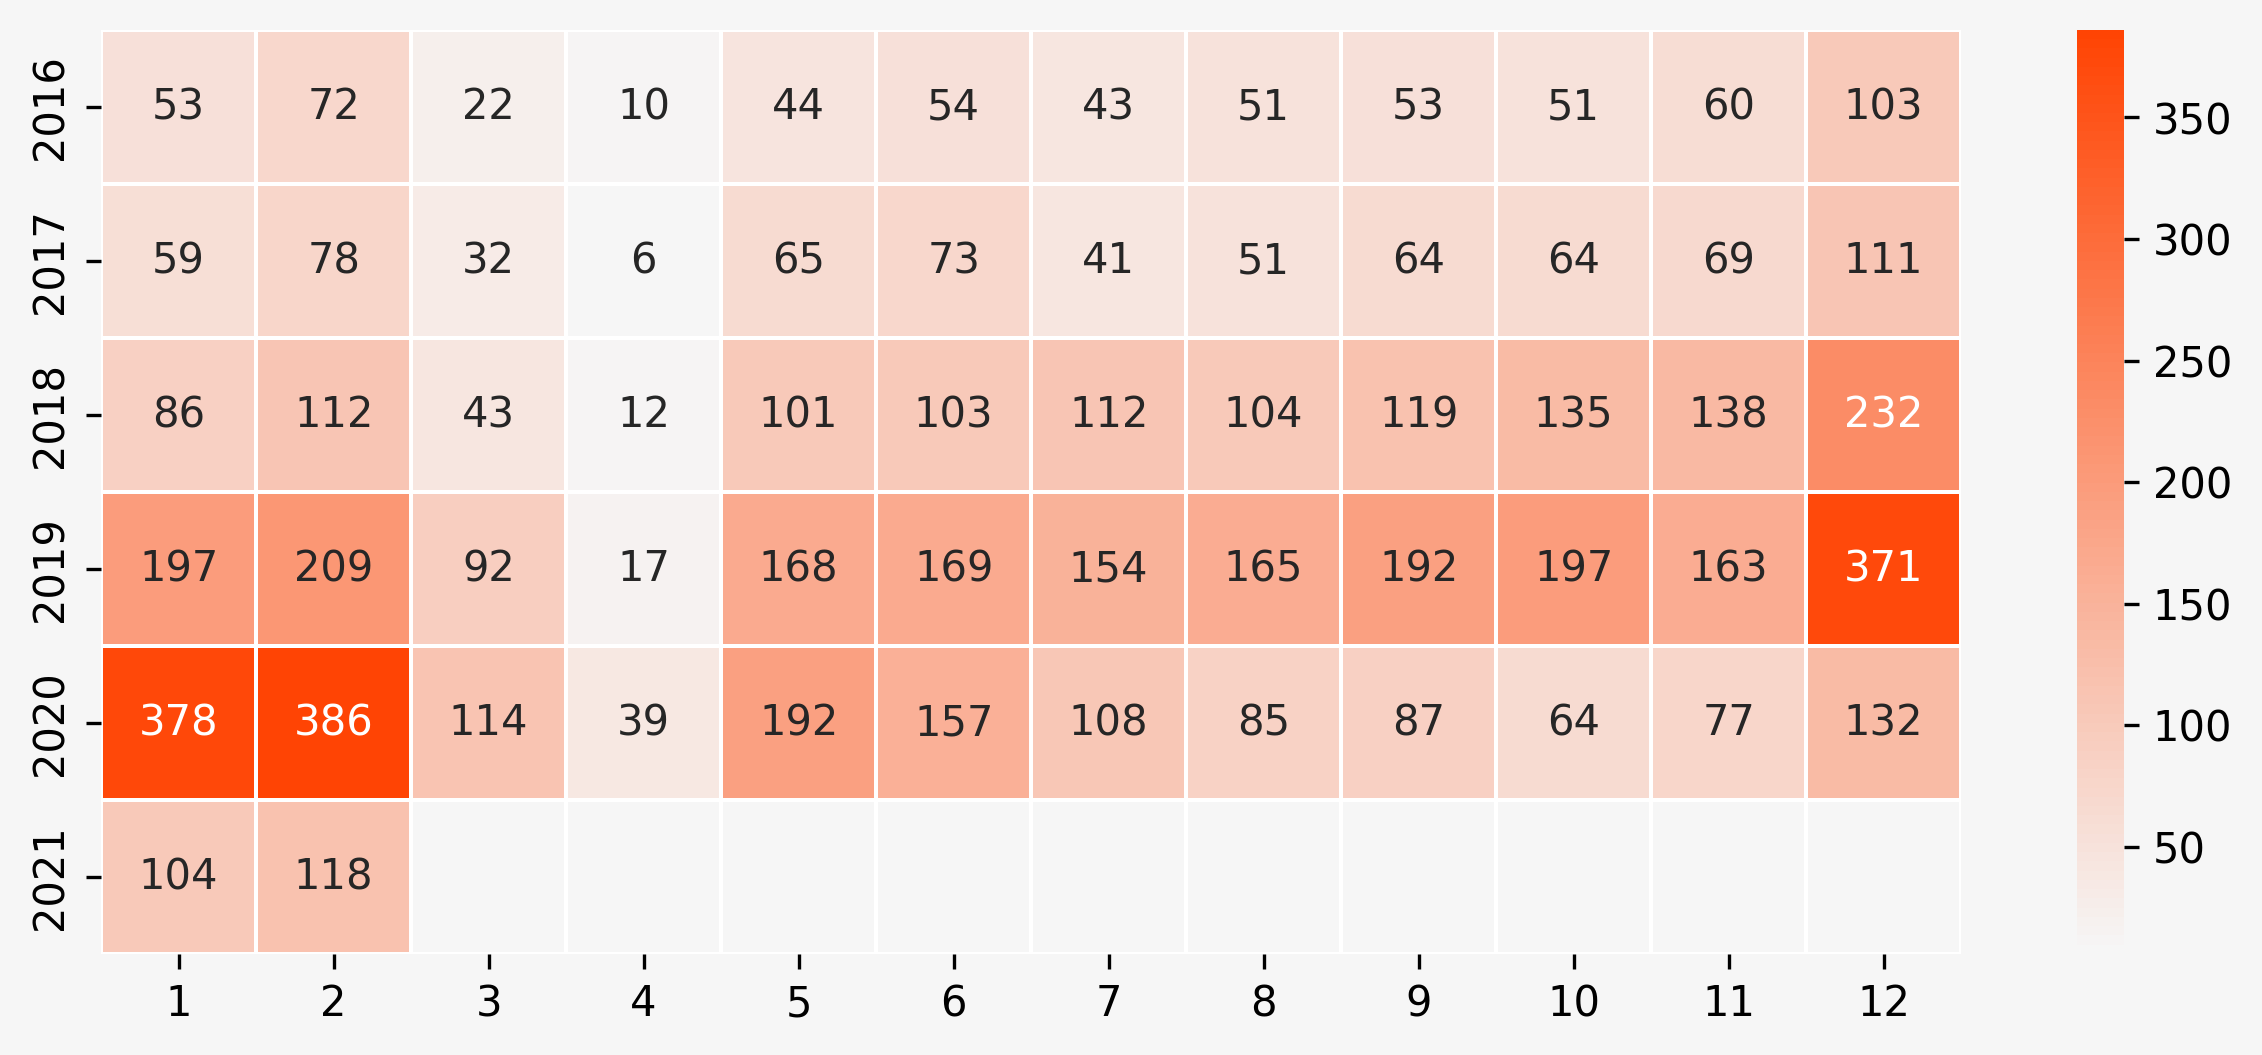

In [ ]:
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month

monthly_orders = df[df['Segment'] == 'Champions'].groupby(['Year', 'Month'])['CustomerKey'].nunique().reset_index()
pivot_orders = monthly_orders.pivot(index='Year', columns='Month', values='CustomerKey')

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('custom', ['#f6f6f6', '#ff4404'], N = 100)

ax = plt.figure(figsize=(10, 4) , dpi = 300)
ax.patch.set_facecolor('#f6f6f6')
ax = sns.heatmap(pivot_orders, annot = True, cmap = cmap, fmt = 'g', linewidths = .5)
plt.xlabel('')
plt.ylabel('')

ax.set_facecolor('#f6f6f6')
plt.show()

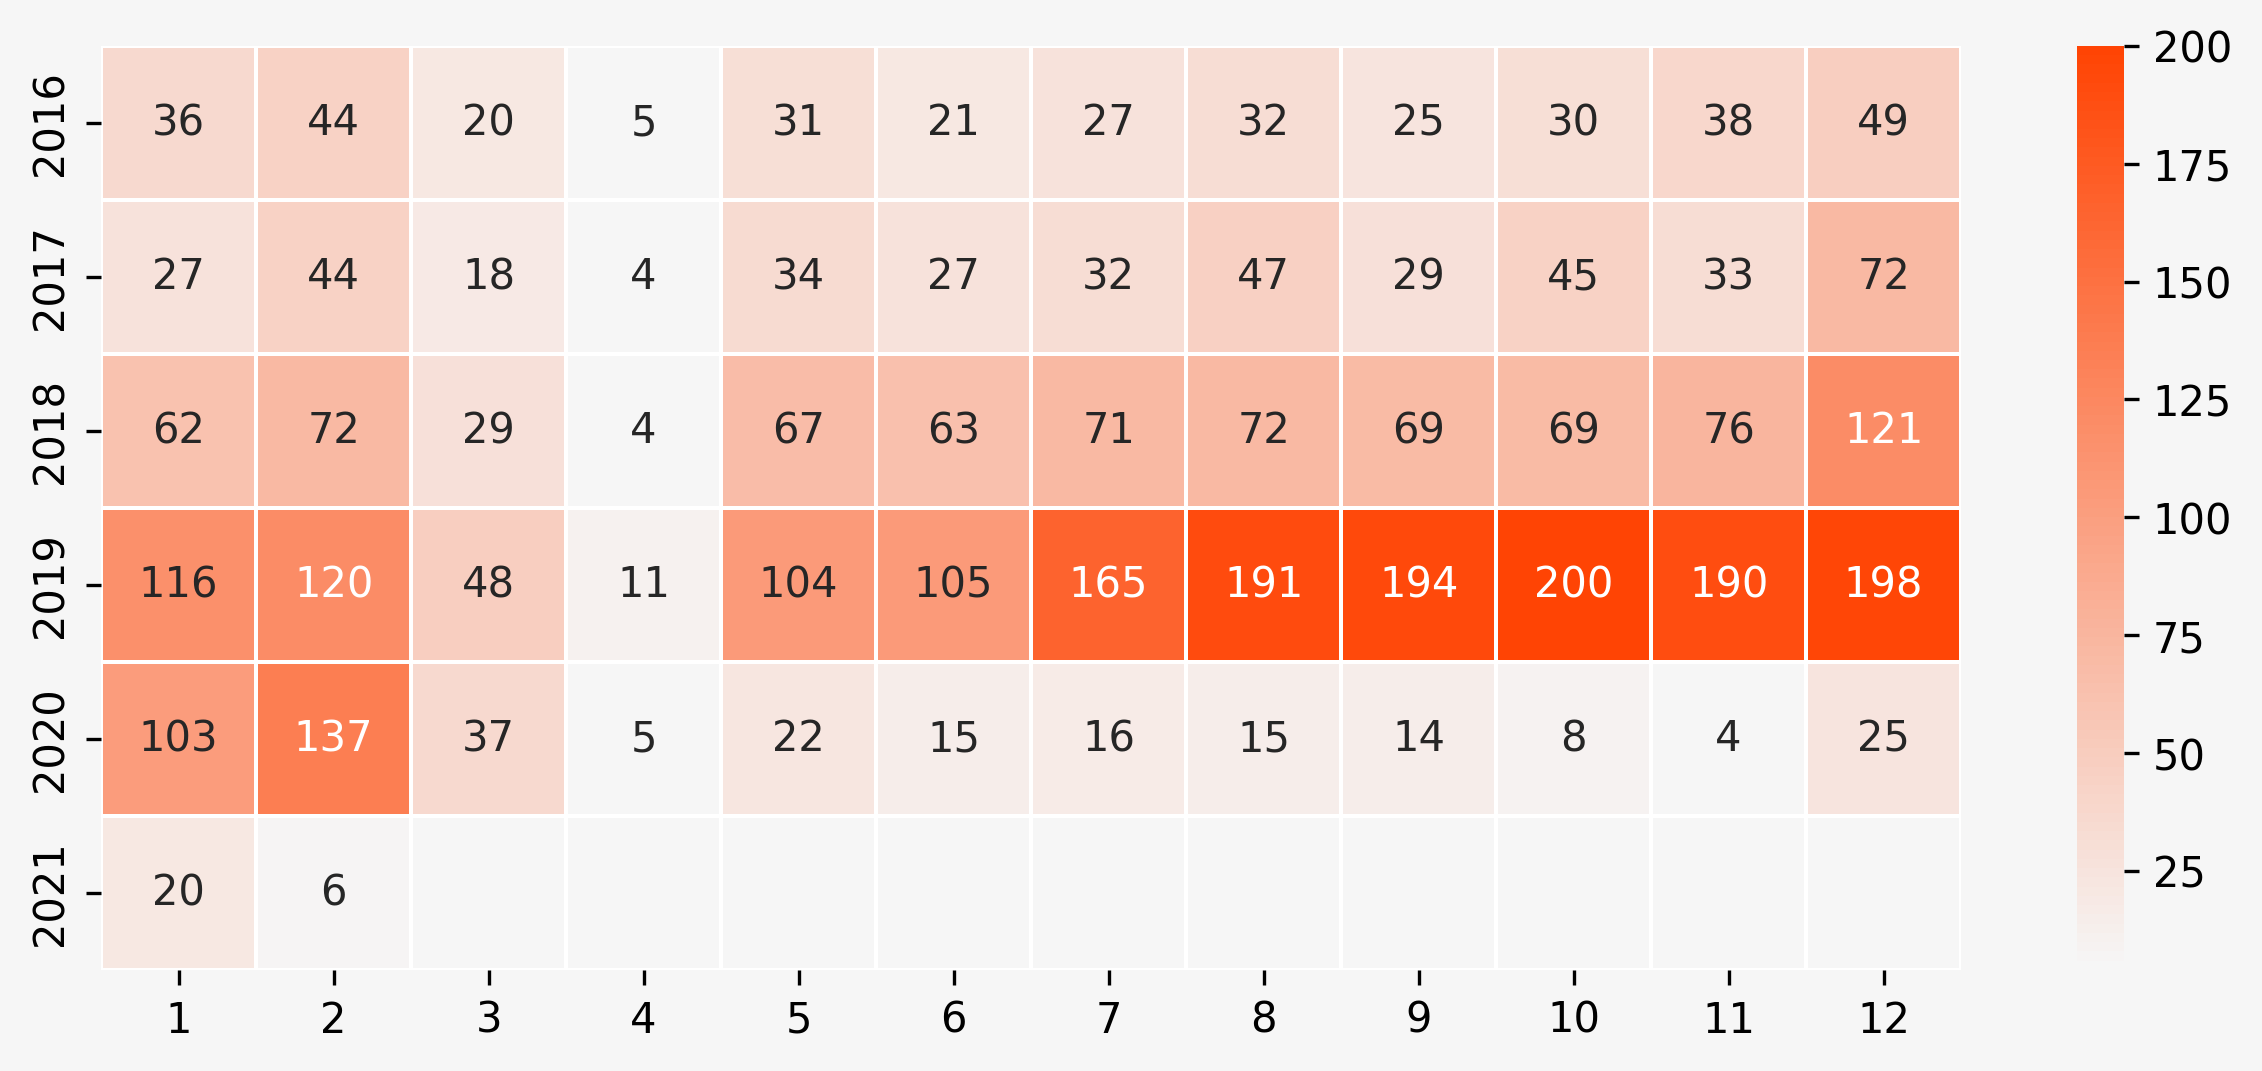

In [ ]:
monthly_orders = df[df['Segment'] == 'Loyal'].groupby(['Year', 'Month'])['CustomerKey'].nunique().reset_index()

pivot_orders = monthly_orders.pivot(index='Year', columns='Month', values='CustomerKey')

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('custom', ['#f6f6f6', '#ff4404'], N = 100)

ax = plt.figure(figsize=(10, 4) , dpi = 300)
ax.patch.set_facecolor('#f6f6f6')
ax = sns.heatmap(pivot_orders, annot = True, cmap = cmap, fmt = 'g', linewidths = .5)
plt.xlabel('')
plt.ylabel('')

ax.set_facecolor('#f6f6f6')
plt.show()

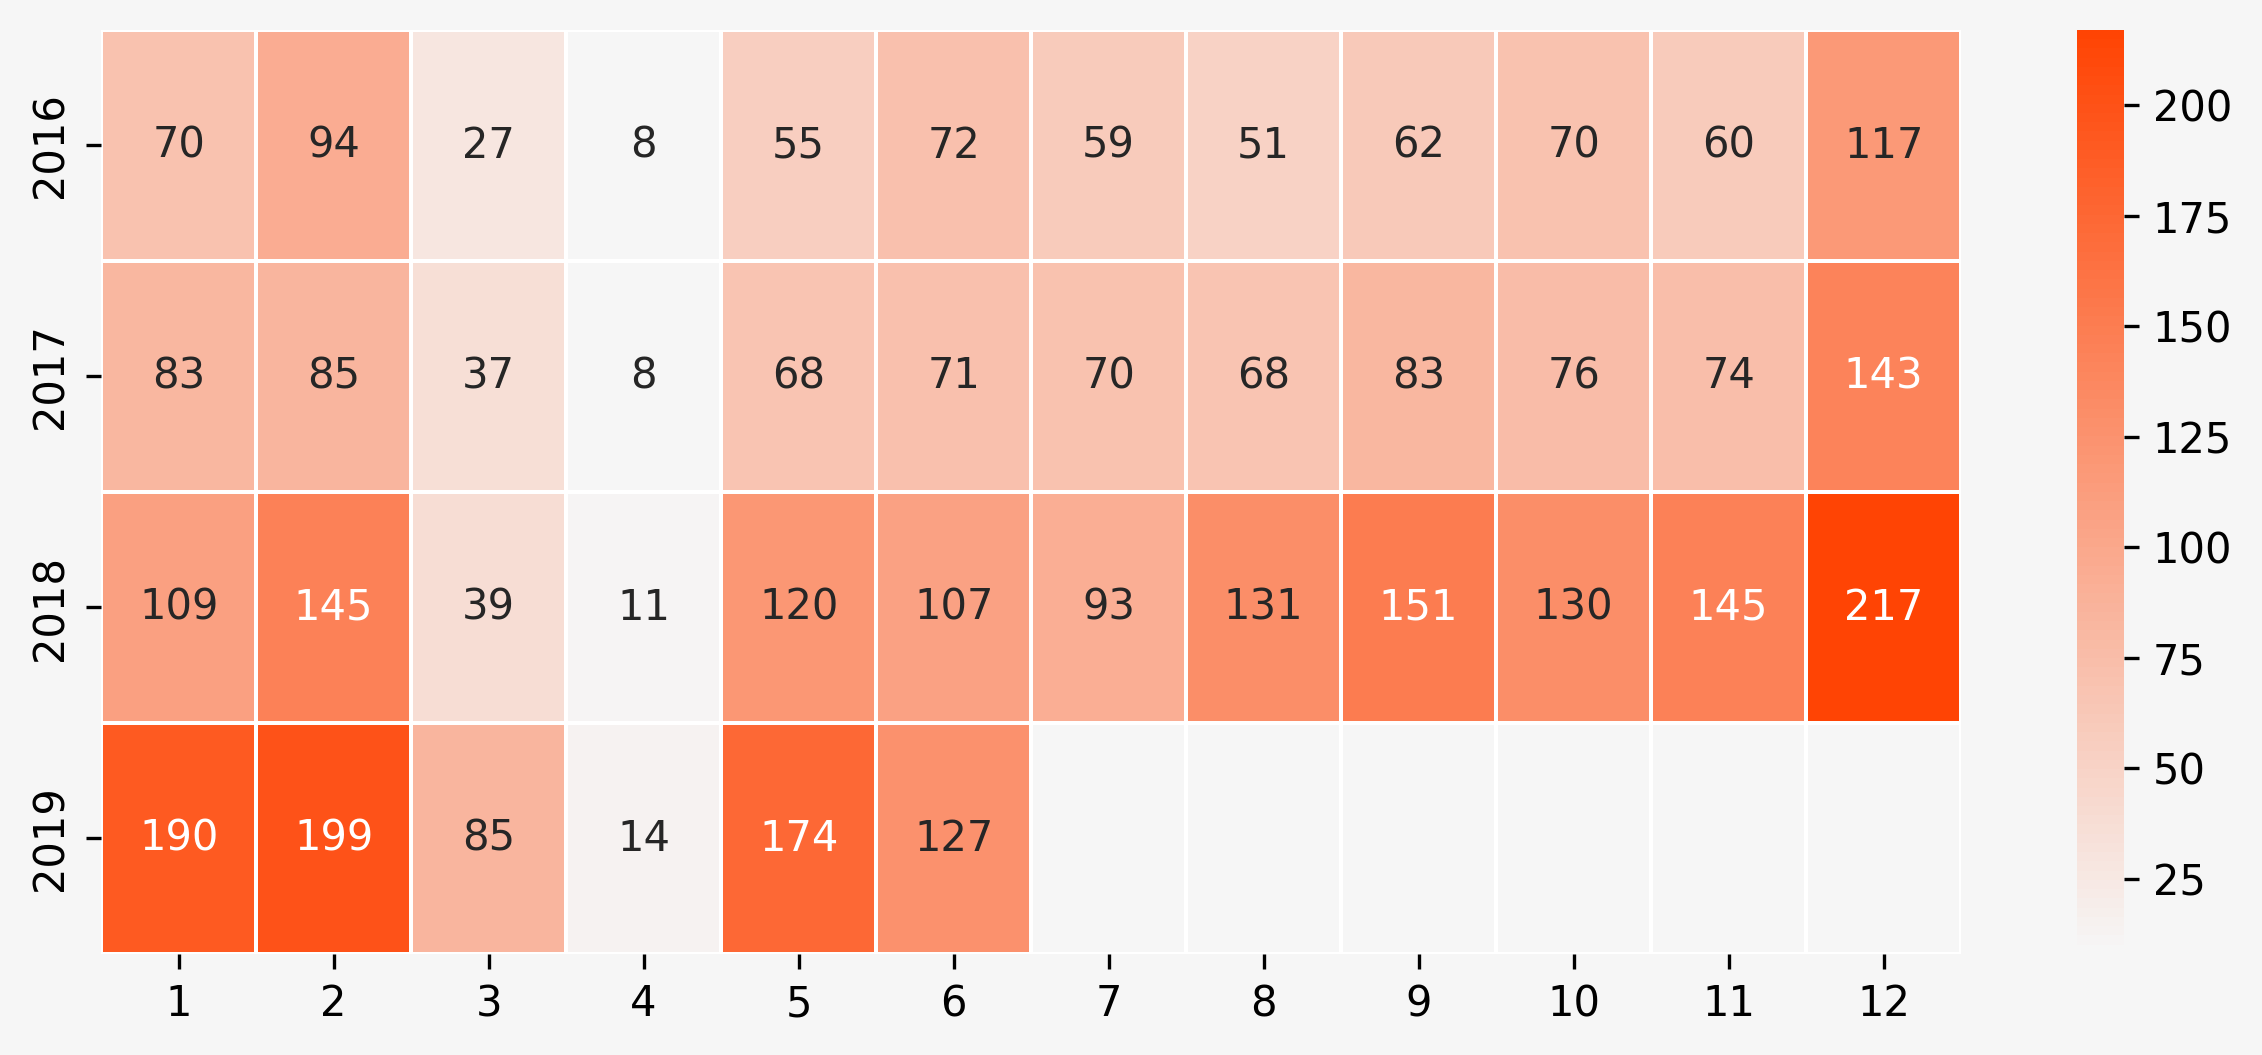

In [ ]:
monthly_orders = df[df['Segment'] == 'At Risk'].groupby(['Year', 'Month'])['CustomerKey'].nunique().reset_index()

pivot_orders = monthly_orders.pivot(index='Year', columns='Month', values='CustomerKey')

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('custom', ['#f6f6f6', '#ff4404'], N = 100)

ax = plt.figure(figsize=(10, 4) , dpi = 300)
ax.patch.set_facecolor('#f6f6f6')
ax = sns.heatmap(pivot_orders, annot = True, cmap = cmap, fmt = 'g', linewidths = .5)
plt.xlabel('')
plt.ylabel('')

ax.set_facecolor('#f6f6f6')
plt.show()

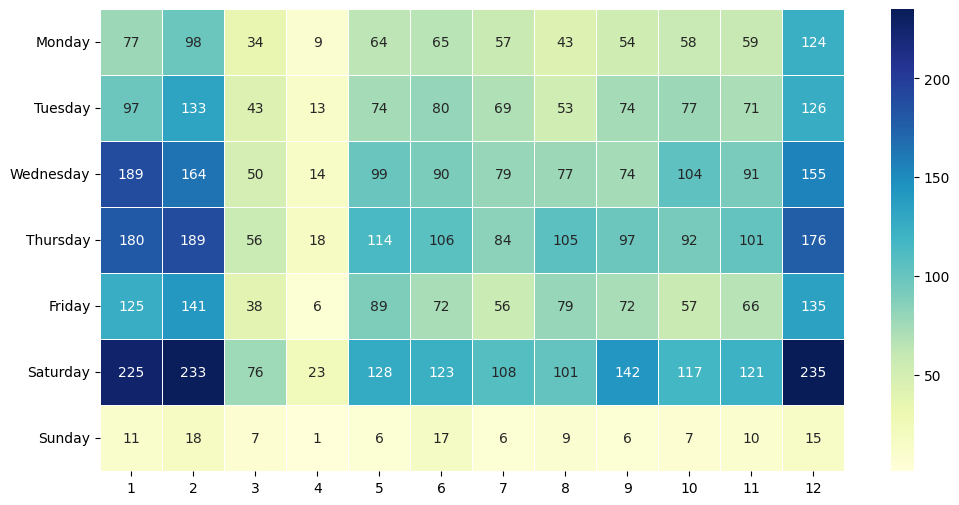

In [ ]:
df_champions = df[df['Segment'] == 'Champions']

df_champions['Day_of_Week'] = df_champions['Order_Date'].dt.dayofweek

df_champions['Day_of_Week_Text'] = df_champions['Day_of_Week'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

df_champions['Day_of_Week_Text'] = pd.Categorical(df_champions['Day_of_Week_Text'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

df_champions['Month'] = df_champions['Order_Date'].dt.month

daily_orders = df_champions.groupby(['Day_of_Week_Text', 'Month'])['CustomerKey'].nunique().reset_index()

pivot_orders = daily_orders.pivot(index='Day_of_Week_Text', columns='Month', values='CustomerKey')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_orders, annot=True, cmap='YlGnBu', fmt='g', linewidths=.5)

plt.xlabel('')
plt.ylabel('')

plt.show()

In [ ]:
category_champions = df[df['Segment'] == 'Champions'].groupby('Category', as_index=False).agg(
    Revenue = ('Amount', 'sum'),
    Total_Orders = ('Order_Number', 'nunique'))

category_champions.columns = ['Category', 'Revenue', 'Total Orders']
category_champions['Revenue'] = category_champions['Revenue'].round(0).astype(int)
category_champions

,Category,Revenue,Total Orders
0,Audio,886523,1753
1,Cameras and camcorders,2225508,1454
2,Cell phones,1888560,2362
3,Computers,6500773,3216
4,Games and Toys,211738,1693
5,Home Appliances,3201310,1445
6,"Music, Movies and Audio Books",914046,2105
7,TV and Video,1956727,933


In [ ]:
category_loyal = df[df['Segment'] == 'Loyal'].groupby('Category', as_index=False).agg(
    Revenue = ('Amount', 'sum'),
    Total_Orders = ('Order_Number', 'nunique'))

category_loyal.columns = ['Category', 'Revenue', 'Total Orders']
category_loyal['Revenue'] = category_loyal['Revenue'].round(0).astype(int)
category_loyal

,Category,Revenue,Total Orders
0,Audio,482472,998
1,Cameras and camcorders,1192708,818
2,Cell phones,1007260,1257
3,Computers,3657188,1747
4,Games and Toys,100705,848
5,Home Appliances,2244501,825
6,"Music, Movies and Audio Books",472991,1173
7,TV and Video,1276578,516


In [ ]:
category_atrisk = df[df['Segment'] == 'At Risk'].groupby('Category', as_index=False).agg(
    Revenue = ('Amount', 'sum'),
    Total_Orders = ('Order_Number', 'nunique'))

category_atrisk.columns = ['Category', 'Revenue', 'Total Orders']
category_atrisk['Revenue'] = category_atrisk['Revenue'].round(0).astype(int)
category_atrisk

,Category,Revenue,Total Orders
0,Audio,612853,1118
1,Cameras and camcorders,1481699,868
2,Cell phones,1112253,1277
3,Computers,4166776,1819
4,Games and Toys,106453,839
5,Home Appliances,3569067,1206
6,"Music, Movies and Audio Books",576228,1219
7,TV and Video,1454843,680


In [ ]:
df = pd.read_csv('aggregate.csv')

In [ ]:
subcategory_champion = df[df['Segment'] == 'Champions'].groupby('Subcategory', as_index=False).agg(
    Total_Orders = ('Order_Number', 'nunique'),
  ).sort_values(by = 'Total_Orders', ascending = False)

subcategory_champion['Order Distribution'] = subcategory_champion['Total_Orders'] / subcategory_champion['Total_Orders'].sum()
subcategory_champion.columns = ['Subcategory', 'Total Orders', 'Order Distribution']
subcategory_champion.head(10)

,Subcategory,Total Orders,Order Distribution
21,Movie DVD,2105,0.126807
9,Desktops,1744,0.105060
1,Bluetooth Headphones,1023,0.061627
28,Touch Screen Phones,952,0.057349
2,Boxed Games,925,0.055723
12,Download Games,913,0.055000
26,Smart phones & PDAs,875,0.052711
24,Recording Pen,560,0.033735
27,Televisions,487,0.029337
6,Cell phones Accessories,455,0.027410


In [ ]:
subcategory_loyal = df[df['Segment'] == 'Loyal'].groupby('Subcategory', as_index=False).agg(
    Total_Orders = ('Order_Number', 'nunique'),
  ).sort_values(by = 'Total_Orders', ascending = False)

subcategory_loyal['Order Distribution'] = subcategory_loyal['Total_Orders'] / subcategory_loyal['Total_Orders'].sum()
subcategory_loyal.columns = ['Subcategory', 'Total Orders', 'Order Distribution']
subcategory_loyal.head(10)

,Subcategory,Total Orders,Order Distribution
21,Movie DVD,1173,0.128816
9,Desktops,972,0.106743
1,Bluetooth Headphones,600,0.065891
26,Smart phones & PDAs,497,0.054579
28,Touch Screen Phones,489,0.053701
12,Download Games,458,0.050297
2,Boxed Games,451,0.049528
24,Recording Pen,318,0.034922
27,Televisions,288,0.031627
17,Laptops,268,0.029431


In [ ]:
subcategory_atrisk = df[df['Segment'] == 'At Risk'].groupby('Subcategory', as_index=False).agg(
    Total_Orders = ('Order_Number', 'nunique'),
  ).sort_values(by = 'Total_Orders', ascending = False)

subcategory_atrisk['Order Distribution'] = subcategory_atrisk['Total_Orders'] / subcategory_atrisk['Total_Orders'].sum()
subcategory_atrisk.columns = ['Subcategory', 'Total Orders', 'Order Distribution']
subcategory_atrisk.head(10)

,Subcategory,Total Orders,Order Distribution
21,Movie DVD,1219,0.120324
9,Desktops,1019,0.100582
1,Bluetooth Headphones,684,0.067516
28,Touch Screen Phones,512,0.050538
26,Smart phones & PDAs,499,0.049255
12,Download Games,475,0.046886
2,Boxed Games,418,0.041260
31,Water Heaters,397,0.039187
27,Televisions,390,0.038496
24,Recording Pen,371,0.036620


In [ ]:
aggregate = df.to_csv('aggregate.csv', index = False)